# Variability VS frequency with the SAME fire

In [4]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [5]:
import numpy as np
from math import *
import matplotlib.pyplot as plt

%matplotlib notebook

exec(open("ode2.py").read(), globals())

## Reference

In [6]:
Freq_v = [0.01, 0.02, 0.05, 0.1, 0.2, 0.5, 1.]
M_v = [0.02, 0.05, 0.1, 0.2, 0.5, 1., 2.]
#nParall = len(M)

In [7]:
a = 0.2
#m_ref = M_v[0]
m_ref = 0.25
d = 0.0625
Param_phy = [a, m_ref, d]
#Param_phy = [a, m_ref]
Init = [0, Param_phy[1]]

      
Init = [1., .5]


freq_ref = Freq_v[0]
Param_freq = {"p":  freq_ref}#2
dt = min([0.1, 0.1/Param_freq["p"]]) ### Use small $dt$ (it could increase when we change the frequency) CHANGED
dt_ref = dt
finalTime = 10000
finalTime_ref = finalTime

Param_strength = {"scale":0.01} # 0.005
Param_coupled = {"alpha":5., # 20
                 "beta":1.}# 2


Fire_param = {"model": "coupled",
                "frequence": "bernoulli",
                "param_freq" : Param_freq,
                "amplitude": "exponential",
                "Param_strength" : Param_strength,
                "Param_coupled" : Param_coupled,
                "type" : "proportionnal",
                "coef_W_N" : 5}

<Figure size 1296x432 with 0 Axes>

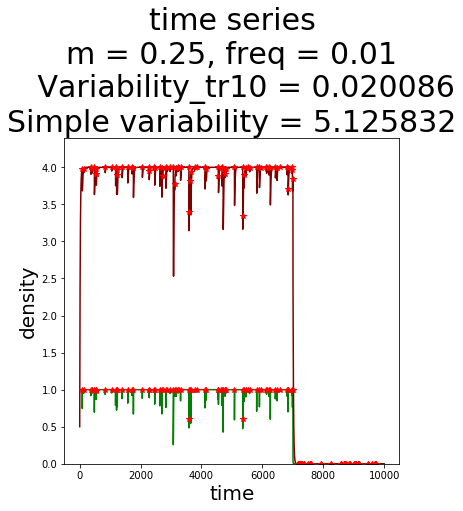

In [5]:
#Fire_events = np.zeros((nParall, 1000), dtype="bool")
#Fire_strength = np.zeros((nParall, 1000))

plt.figure(figsize = (18, 6))
O = Ode(model = "allee_effect_adi_3", Init=Init, Param_phy= Param_phy, finalTime = finalTime, dt=dt_ref, Fire_param = Fire_param)
nbreIter_ref = O.NbreIte
Fire_events = O.Fire_events
Fire_strength = O.Fire_strength
O.solve_by_part()
var = O.variability("N+W")
var_a = np.var(O.N+O.W)
#plt.figure(figsize = (12, 6))
#plt.subplot(1, nParall, j+1)
plt.figure(figsize = (6, 6))
O.plot_time_series(generation=False, show=False, legend = False)
plt.title("time series\nm = "+str(m_ref)+", freq = "+str(freq_ref)+"\n   Variability_tr10 = "+str(round(var, 6))+"\nSimple variability = "+str(round(var_a, 6)), fontsize = 30)
plt.show()

#### Etirements de l'array Fire Fire_events[j, :] et Fire_strength[j]

In [8]:
def same(M, Freq, show=True):
    nParall = len(M)
    Var = np.zeros((len(Freq), nParall))
    Var_a = np.zeros((len(Freq), nParall))
    for i, freq in enumerate(Freq):
        ratio = round(freq/freq_ref, 4)
        #dt = round(dt_ref/ratio, 3)
        dt = dt_ref/ratio
        #finalTime  = round(finalTime_ref / ratio, 3)
        finalTime = finalTime_ref / ratio

        # Faire un dt plus inteligent pour eviter qu'il devienne trop grand
        #if(freq < freq_ref): #étirer
       # elif(freq > freq_ref):
        #    pass
        #else:
      #      dt = dt_ref

        #print("m = "+str(m))
        
        if(show):
            plt.figure(figsize = (30, 6))
        for j in range(nParall):
            Param_phy[1] = M[j]
            Init[1] = Param_phy[1]
            O = Ode(model = "allee_effect_adi_3", Init=Init, Param_phy= Param_phy, finalTime = finalTime, dt=dt, Fire_param = Fire_param)
            if(ratio > 1 ):
                O.Fire_events[:nbreIter_ref]  = Fire_events[:len(O.Fire_events)]
                O.Fire_strength[:nbreIter_ref] = Fire_strength[:len(O.Fire_strength)]

            elif(ratio < 1):
                O.Fire_events  = Fire_events[:len(O.Fire_events)]
                O.Fire_strength = Fire_strength[:len(O.Fire_strength)]
            else:
                O.Fire_events = Fire_events
                O.Fire_strength = Fire_strength  
            O.solve_by_part()
            var = O.variability("N+W")
            var_a = np.var(O.N+O.W)
            Var[i,j] = var
            Var_a[i,j] = var_a
            if(show):
                plt.subplot(1, nParall, j+1)
                O.plot_time_series(generation=False, show=False, legend = False)
                plt.xlim(-2, 1.05*finalTime_ref)
                plt.title("time series\nm = "+str(M[j])+", freq = "+str(Freq[i])+"\n   Variability_tr10 = "+str(round(var, 6))+"\nSimple variability = "+str(round(var_a, 6)), fontsize = 21)
#        O.plot_time_series()
        if(show):
            plt.show()
    return Var, Var_a

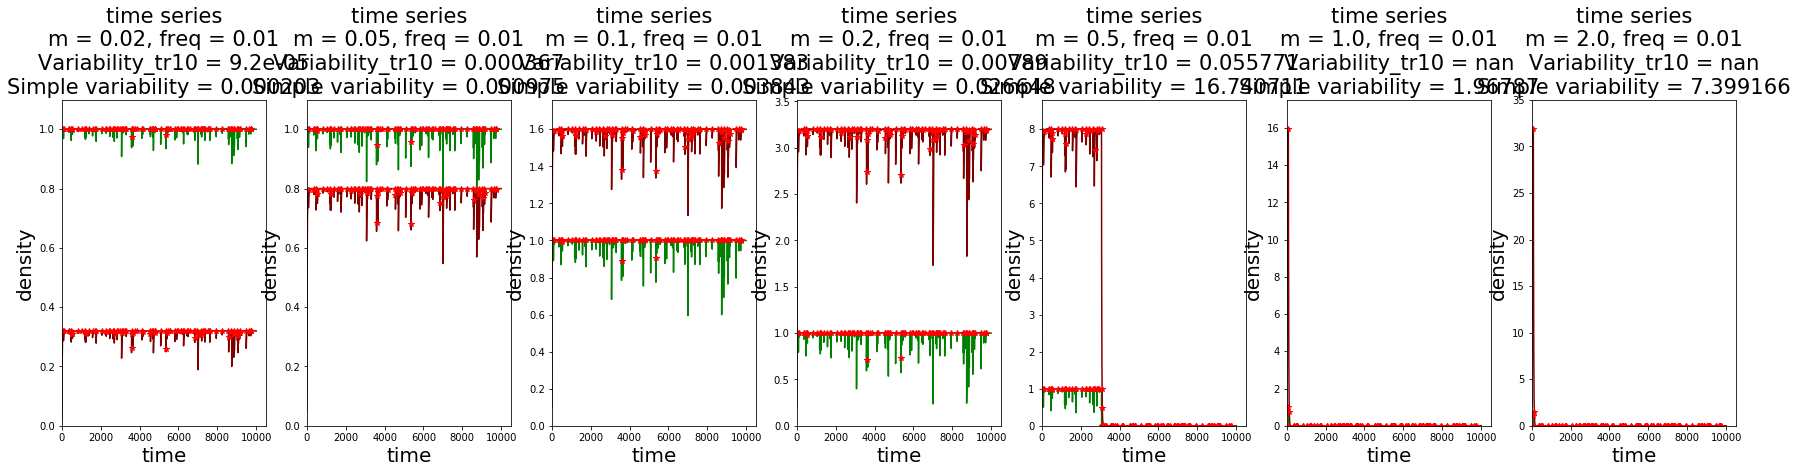

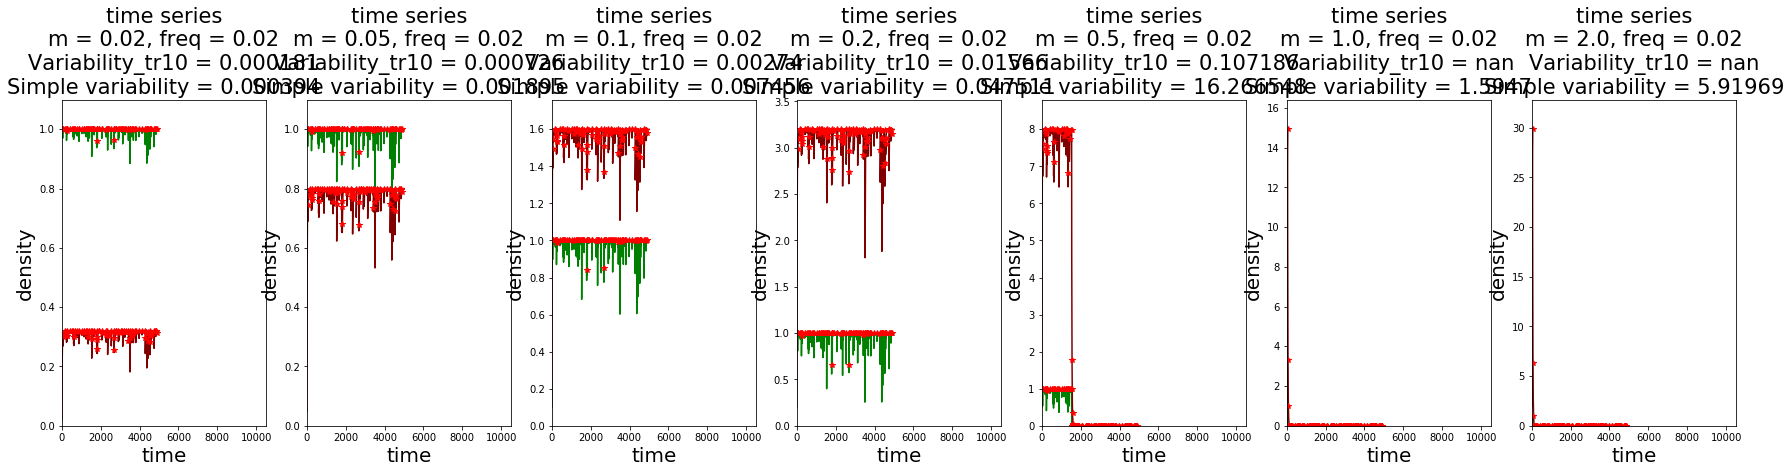

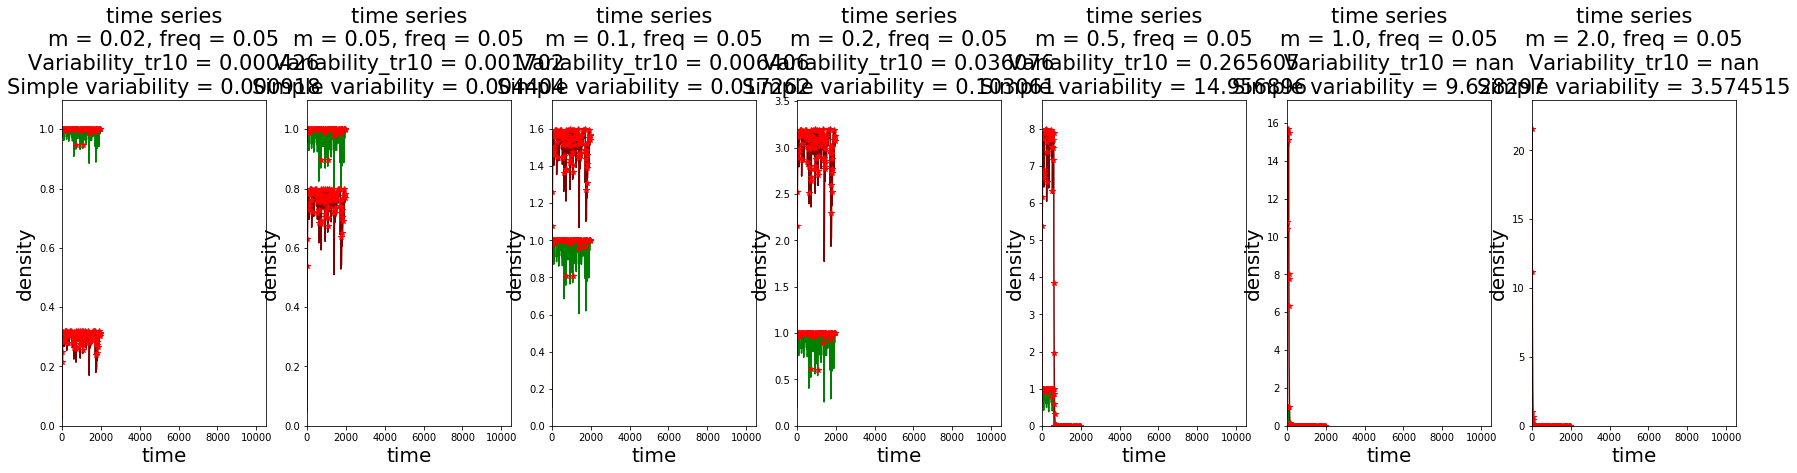

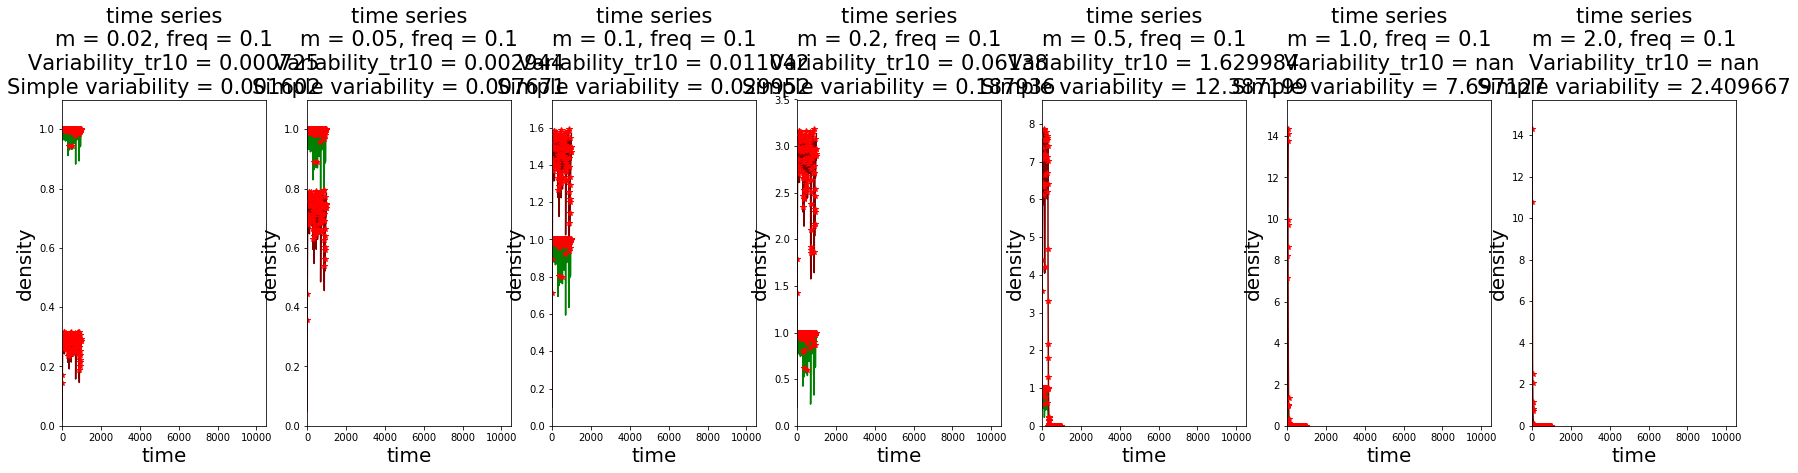

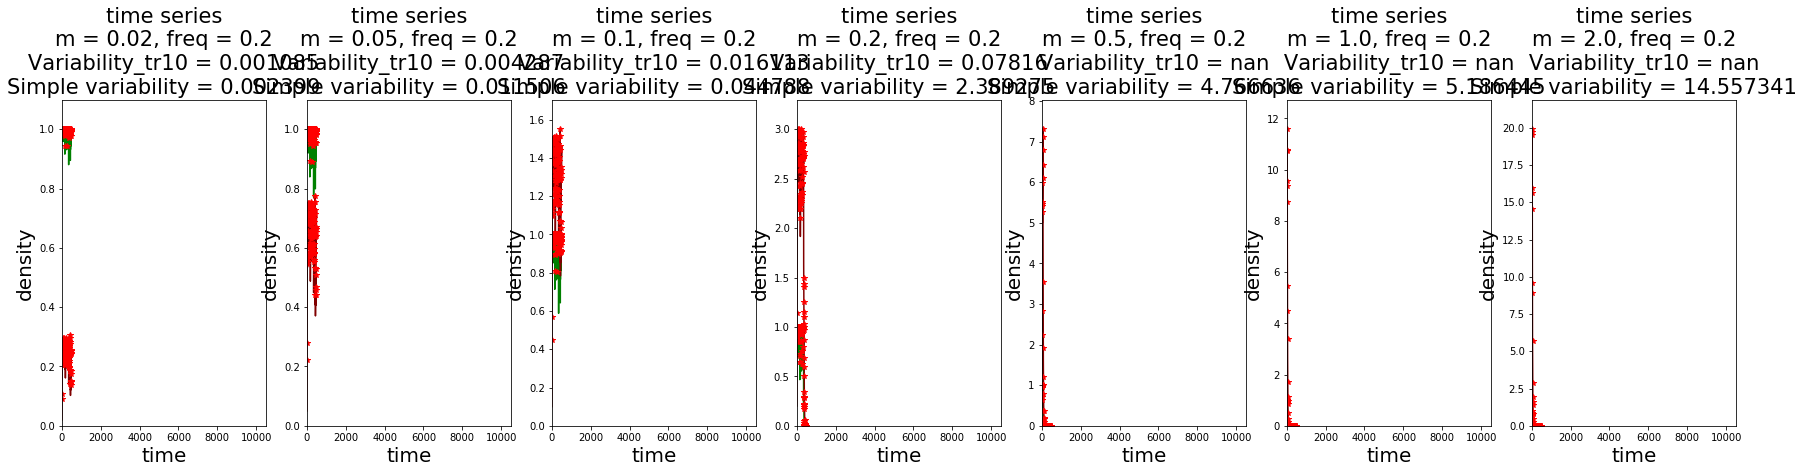

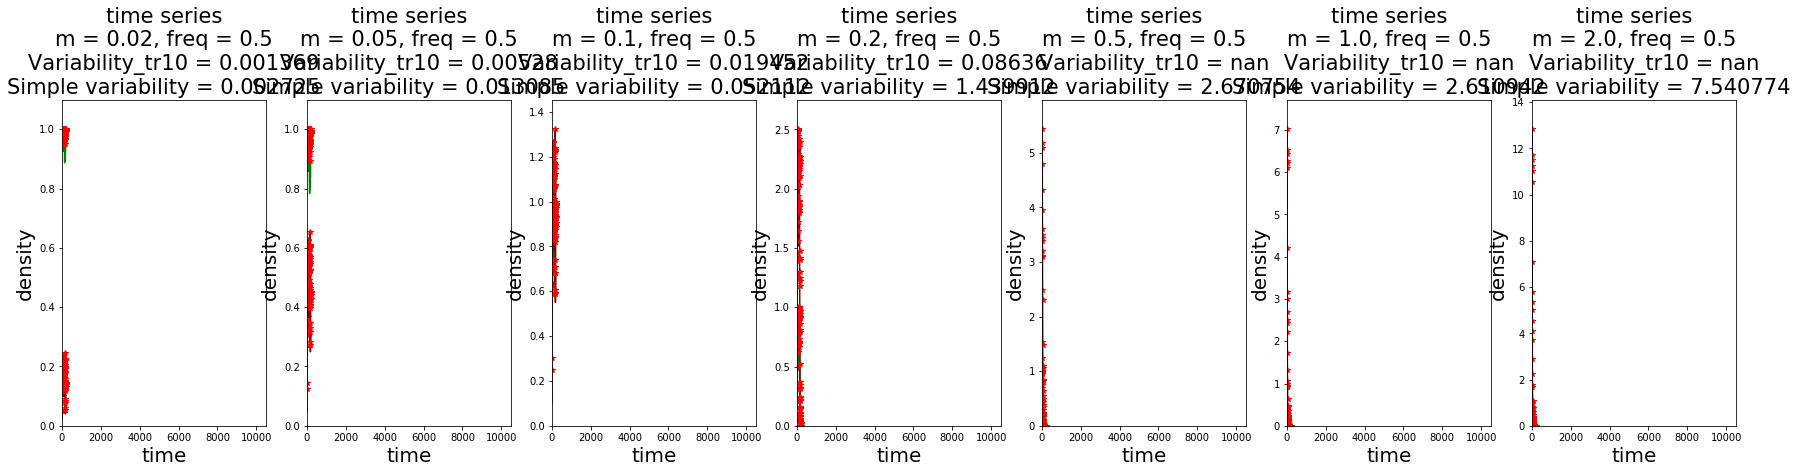

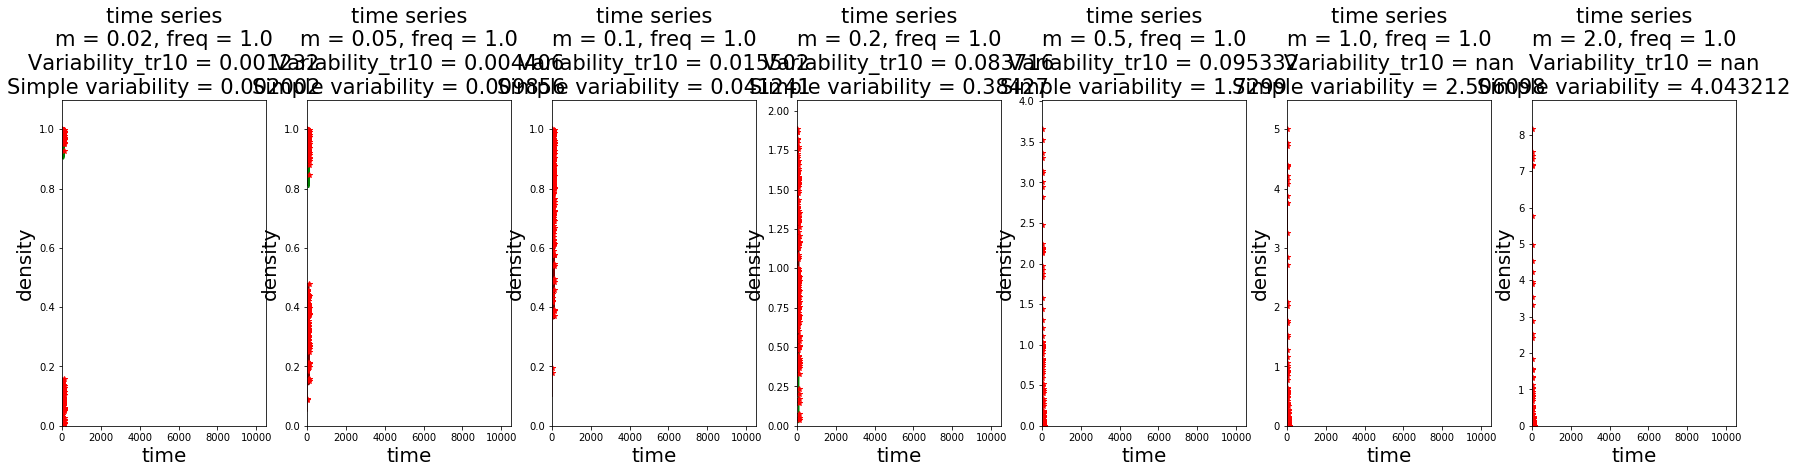

In [7]:
Var, Var_a = same(M_v, Freq_v, show=True)

In [8]:
Freq_c = [0.4, 0.6, 0.7, 0.8, 0.9, 0.95, 1.0, 1.05, 1.1, 1.15, 1.2, 1.3, 1.35, 1.4, 1.5, 1.55, 1.6, 1.7, 1.72, 1.73, 1.74, 1.76, 1.78, 1.8, 1.85, 1.9, 1.95, 2., 2.1, 2.2, 2.3, 2.4, 2.5, 2.7, 3., 4., 6.]
# less point should be enough
M_c = [0.8, 0.9, 1., 1.05, 1.1]
Var, Var_a = same(M_c, Freq_c, show = False)

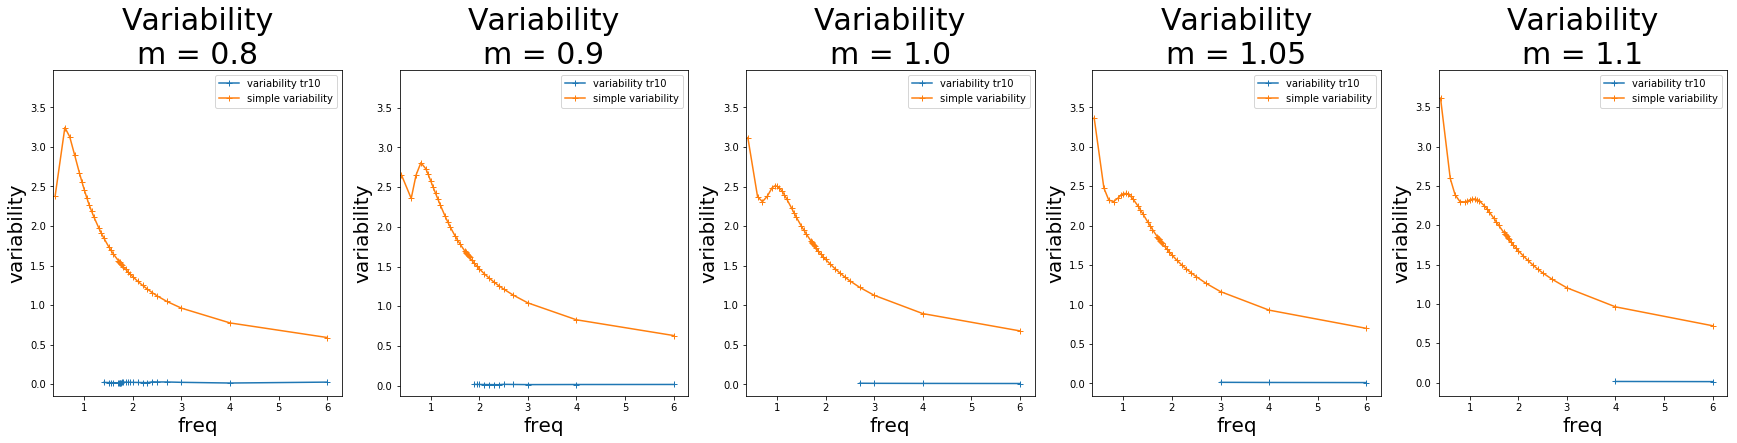

In [9]:
plt.figure(figsize = (30, 6))
mmax_tr10 = np.nanmax(np.nanmax(Var))
mmax_a = np.nanmax(np.nanmax(Var_a))
mmax = max([mmax_tr10, mmax_a])

for j,m in enumerate(M_c):
    plt.subplot(1, len(M_c), j+1)
    plt.plot(Freq_c, Var[:,j], "+-", label="variability tr10")
    plt.plot(Freq_c, Var_a[:,j], "+-", label="simple variability")
    plt.legend()
    plt.title("Variability\nm = "+str(M_c[j]), fontsize = 30)
    plt.xlabel("freq", fontsize = 20)
    plt.ylabel("variability", fontsize = 20)
    plt.ylim(top = 1.1*mmax)
    plt.xlim(0.9*Freq_c[0], 1.05*Freq_c[-1])
plt.show()

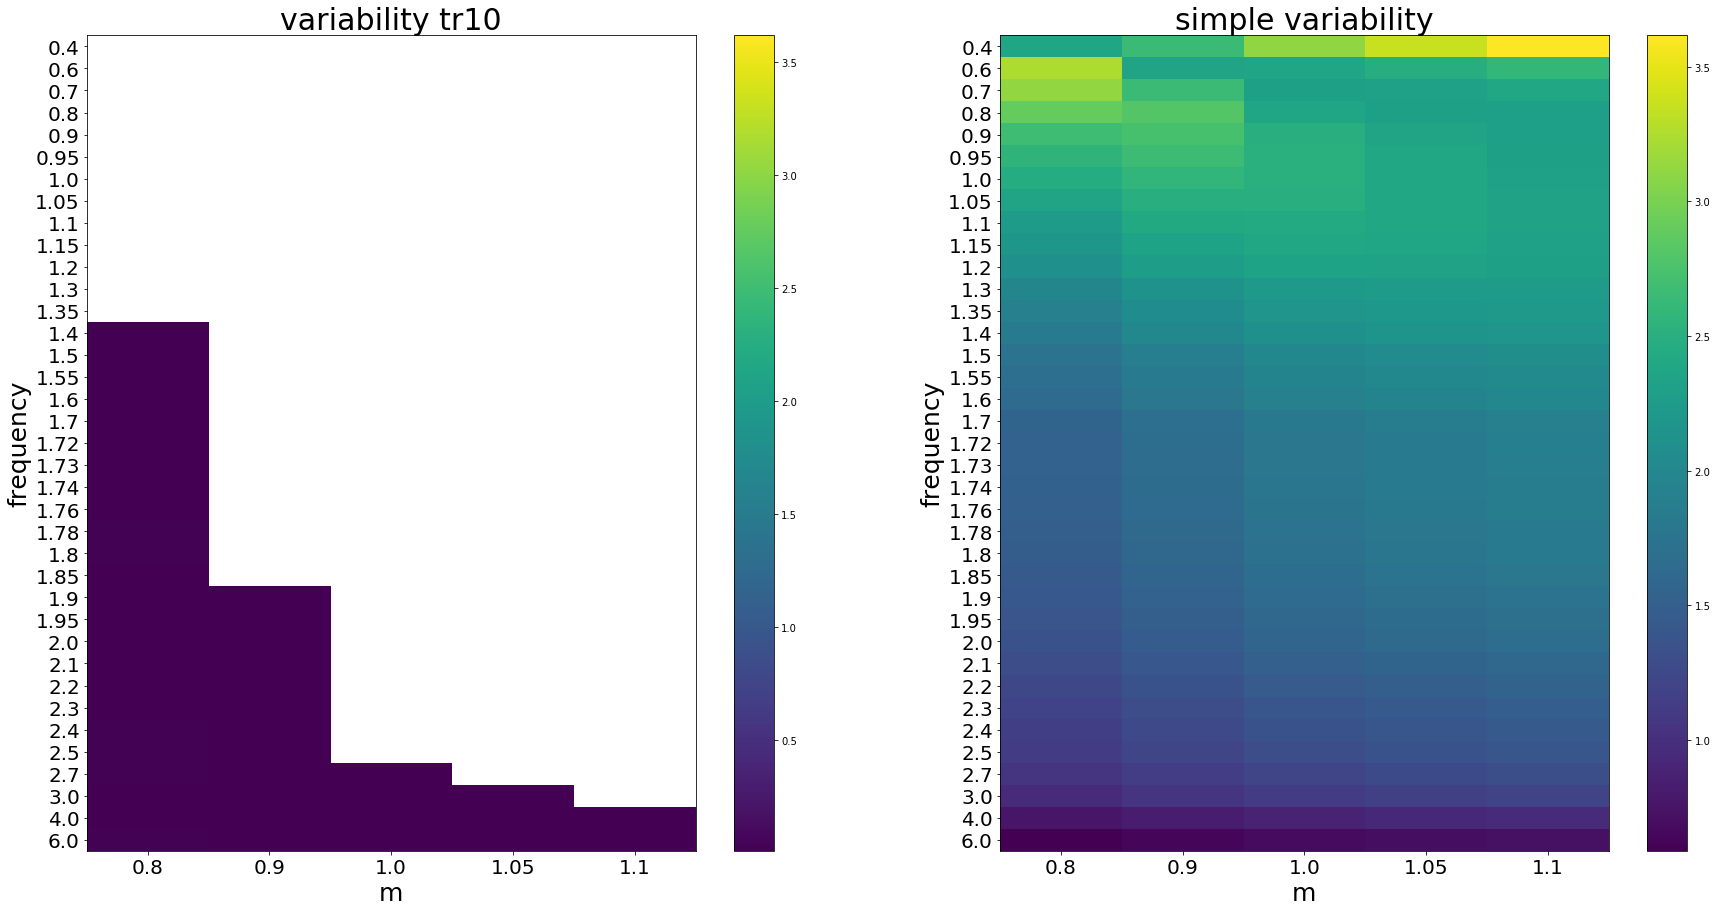

In [10]:
plt.subplots(figsize=(30, 15))

plt.subplot(1,2,1)
plt.title("variability tr10", fontsize = 30)
plt.imshow(Var, vmax=mmax, aspect="auto")
plt.xticks(np.arange(len(M_c)), M_c, fontsize=20)
plt.xlabel("m", fontsize=25)
plt.yticks(np.arange(len(Freq_c)), Freq_c, fontsize=20)
plt.ylabel("frequency", fontsize=25)
plt.colorbar()

plt.subplot(1,2,2)
plt.title("simple variability", fontsize = 30)
plt.imshow(Var_a, vmax=mmax, aspect="auto")
plt.xticks(np.arange(len(M_c)), M_c, fontsize=20)
plt.xlabel("m", fontsize=25)
plt.yticks(np.arange(len(Freq_c)), Freq_c, fontsize=20)
plt.ylabel("frequency", fontsize=25)
plt.colorbar()

plt.show()

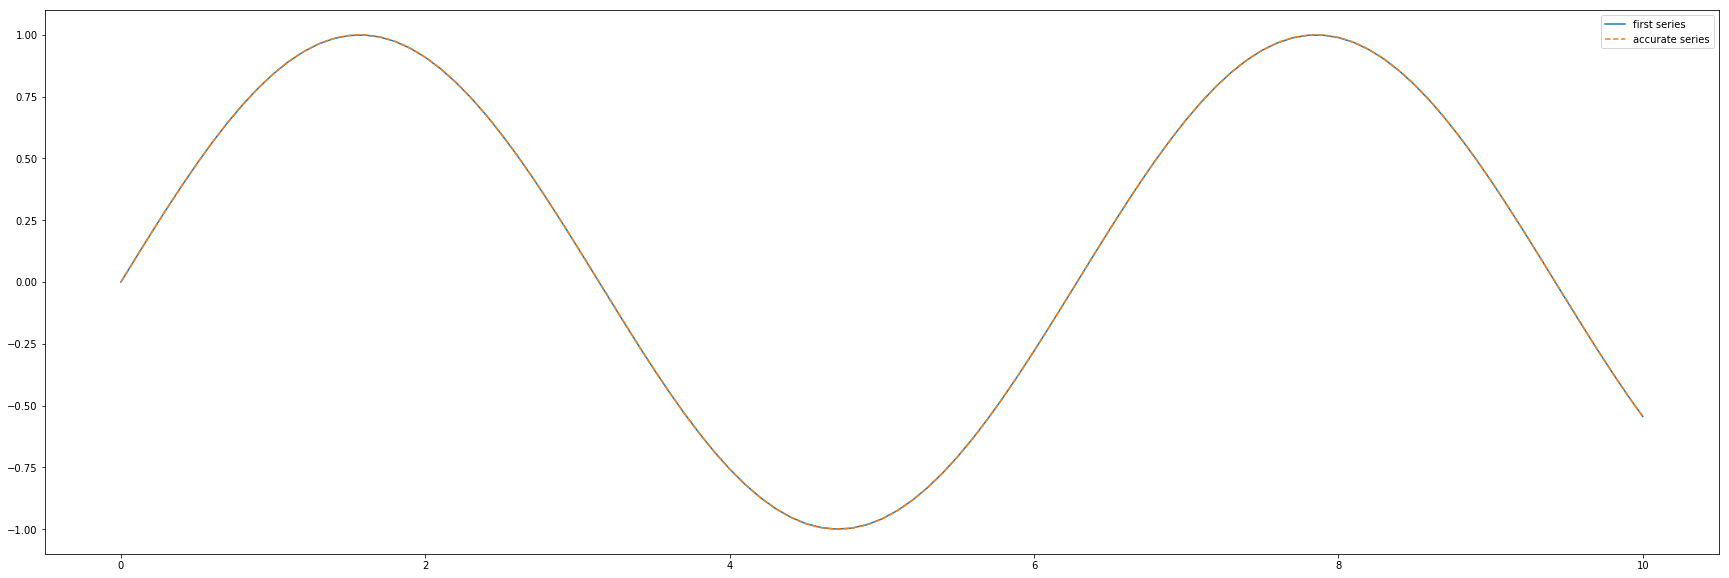

variability first :  0.4418649070398085
Accurate variability :  0.443354367937527


In [11]:
X = np.linspace(0, 10, 101)
S = np.sin(X)
Xa = np.linspace(X[0], X[-1], 10000*len(X))
Sa = np.sin(Xa)

plt.figure(figsize = (30, 10))
plt.plot(X, S, label="first series")
plt.plot(Xa, Sa, "--", label="accurate series")
plt.legend()
plt.show()
print("variability first : ", np.var(S))
print("Accurate variability : ", np.var(Sa))

###### We can see above that even if the plot look similar, change $dt$ can change the value of the variability.

## Same time study, same $dt$

In [12]:
freq_max = 5.
Ratio = np.array([200, 100, 50, 20, 10, 5, 1])
#Ratio = np.array([10, 1])
Freq = freq_max/Ratio
Freq

array([0.025, 0.05 , 0.1  , 0.25 , 0.5  , 1.   , 5.   ])

In [13]:
a = 0.2
#m_ref = M_v[0]
m_ref = 0.25
d = 0.0625
Param_phy = [a, m_ref, d]
#Param_phy = [a, m_ref]
#Init = [0, Param_phy[1]]

      
Init = [1., .5]


freq_ref = Freq_v[0]
Param_freq = {"p":  freq_max}#2
dt = min([0.1, 0.1/Param_freq["p"]]) ### Use small $dt$ (it could increase when we change the frequency) CHANGED
dt_ref = dt
finalTime = 1000
finalTime_ref = finalTime

Param_strength = {"scale":0.005} # 0.005
Param_coupled = {"alpha":20., # 20
                 "beta":2.}# 2


Fire_param = {"model": "coupled",
                "frequence": "bernoulli",
                "param_freq" : Param_freq,
                "amplitude": "exponential",
                "Param_strength" : Param_strength,
                "Param_coupled" : Param_coupled,
                "type" : "proportionnal",
                "coef_W_N" : 5}

In [9]:
def generation_sol(Ratio, Freq):
    freq_max = np.max(Freq)
    dt = 0.01/freq_max
    finalTime_min = 100 ###################################################################################################################################### 10 ########
    O = Ode(model = "allee_effect_adi_3", Init=Init, Param_phy= Param_phy, finalTime = finalTime_min, dt=dt, Fire_param = Fire_param)
    Fire_events = O.Fire_events
    Fire_strength = O.Fire_strength
    Osave = []
    for i, (ratio, freq) in enumerate(zip(Ratio, Freq)):
        #ratio = freq_max/freq
        #print("\nratio", ratio)
        finalTime = int(finalTime_min*ratio)
        #print("finalTime", finalTime)
        Osave += [Ode(model = "allee_effect_adi_3", Init=Init, Param_phy= Param_phy, finalTime = finalTime, dt=dt, Fire_param = Fire_param)]
        Osave[i].Fire_events = np.zeros_like(Osave[i].Fire_events)
        Osave[i].Fire_strength = np.zeros_like(Osave[i].Fire_strength)
        Osave[i].Fire_events[::ratio]  = Fire_events[:]
        Osave[i].Fire_strength[::ratio] = Fire_strength[:]    

        Osave[i].solve_by_part()
    return Osave

In [ ]:
Osave = generation_sol(Ratio, Freq)

### With the same time (100)

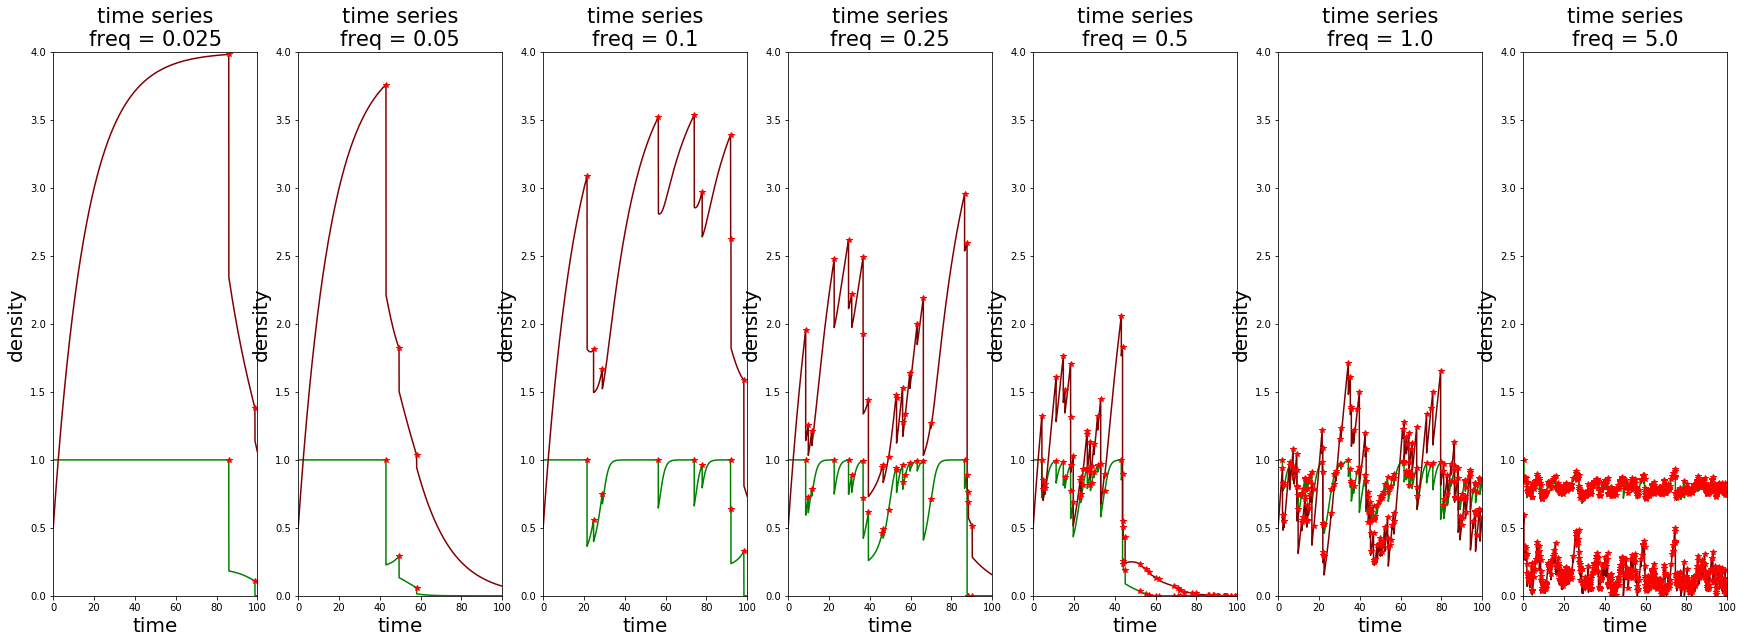

In [15]:
plt.figure(figsize = (30, 10))
for i, (ratio, freq) in enumerate(zip(Ratio, Freq)):
    plt.subplot(1, len(Freq), i+1)
    Osave[i].plot_time_series(generation=False, show=False, legend = False)
    plt.xlim(0, 100)
    plt.ylim(top = 4.)
    #plt.xlim(-2, 1.05*finalTime_ref)
    #plt.title("time series\nfreq = "+str(freq)+"\n   Variability_tr10 = "+str(round(var, 6))+"\nSimple variability = "+str(round(var_a, 6)), fontsize = 21)
    plt.title("time series\nfreq = "+str(freq), fontsize = 21)#+"\n   Variability_tr10 = "+str(round(var, 6))+"\nSimple variability = "+str(round(var_a, 6)), fontsize = 21)
    #        O.plot_time_series()
plt.show()

##### For time series (freq = 0.1 and freq = 0.25) the same fire (time ~ 35 and time ~ 17) have a different impact, for the first collapse (because W is high > 3) but not for the second (W is lower ~ 2 )

### With all the time

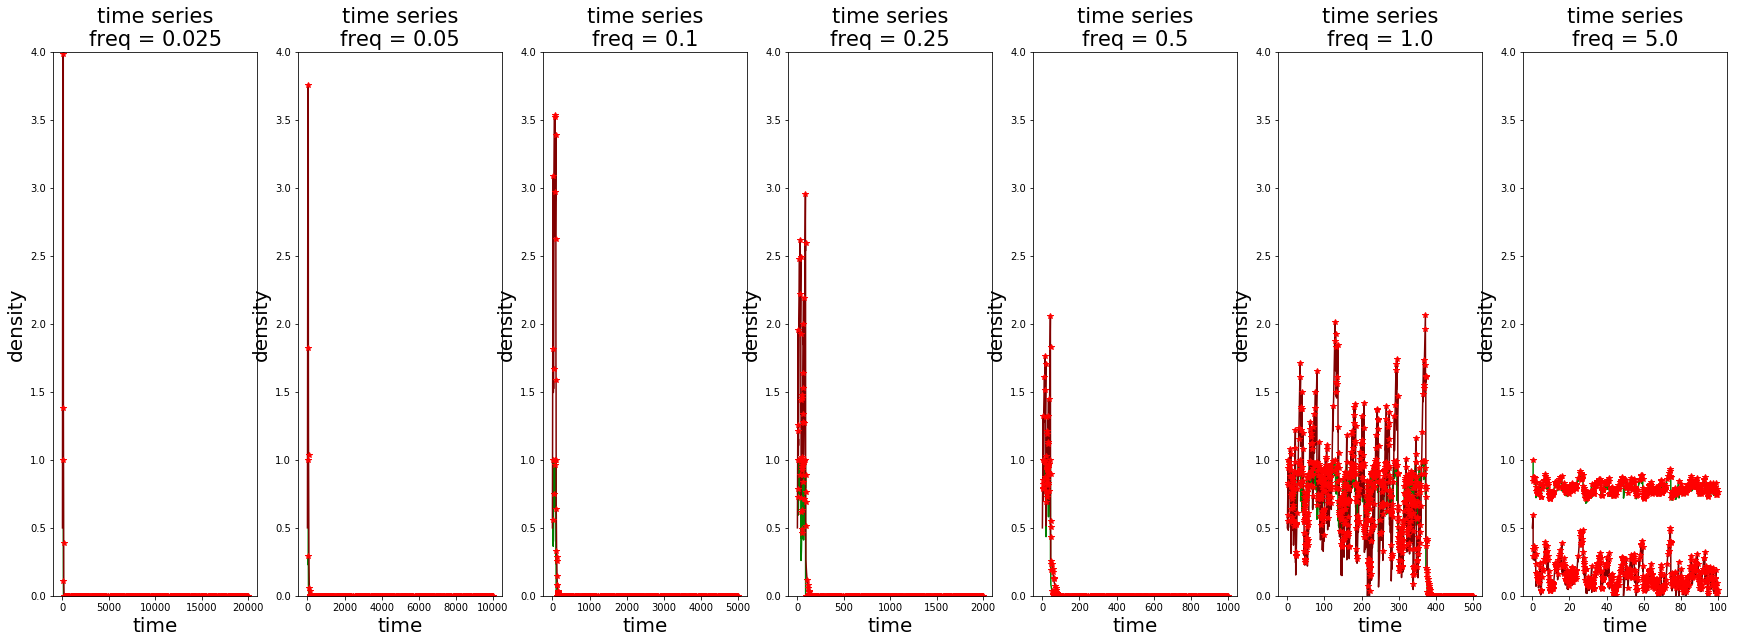

In [16]:
plt.figure(figsize = (30, 10))
for i, (ratio, freq) in enumerate(zip(Ratio, Freq)):
    plt.subplot(1, len(Freq), i+1)
    Osave[i].plot_time_series(generation=False, show=False, legend = False)
    #plt.xlim(0, 100)
    #plt.xlim(-2, 1.05*finalTime_ref)
    plt.ylim(top = 4.)
    #plt.title("time series\nfreq = "+str(freq)+"\n   Variability_tr10 = "+str(round(var, 6))+"\nSimple variability = "+str(round(var_a, 6)), fontsize = 21)
    plt.title("time series\nfreq = "+str(freq), fontsize = 21)#+"\n   Variability_tr10 = "+str(round(var, 6))+"\nSimple variability = "+str(round(var_a, 6)), fontsize = 21)
    #        O.plot_time_series()
plt.show()

In [17]:
def compute_var(Osave, Ratio, Freq):
    Var = np.zeros(len(Freq))
    Var_a = np.zeros_like(Var)
    Var_same_time = np.zeros_like(Var)
    Var_a_same_time = np.zeros_like(Var)
    for i, (ratio, freq) in enumerate(zip(Ratio, Freq)):
        var = Osave[i].variability("N")
        var_a = np.var(Osave[i].N)
        Ointer = Osave[i].copy()
        Ointer.N, Ointer.W = Ointer.N[Osave[i].Time < 500], Ointer.W[Osave[i].Time < 500]
        var_same_time = Ointer.variability("N")
        var_a_same_time = np.var((Osave[i].N)[Osave[i].Time < 500])
        Var[i] = var
        Var_a[i] = var_a    
        Var_same_time[i] = var_same_time
        Var_a_same_time[i] = var_a_same_time
    return Var, Var_a, Var_same_time, Var_a_same_time

Var, Var_a, Var_same_time, Var_a_same_time = compute_var(Osave, Ratio, Freq)

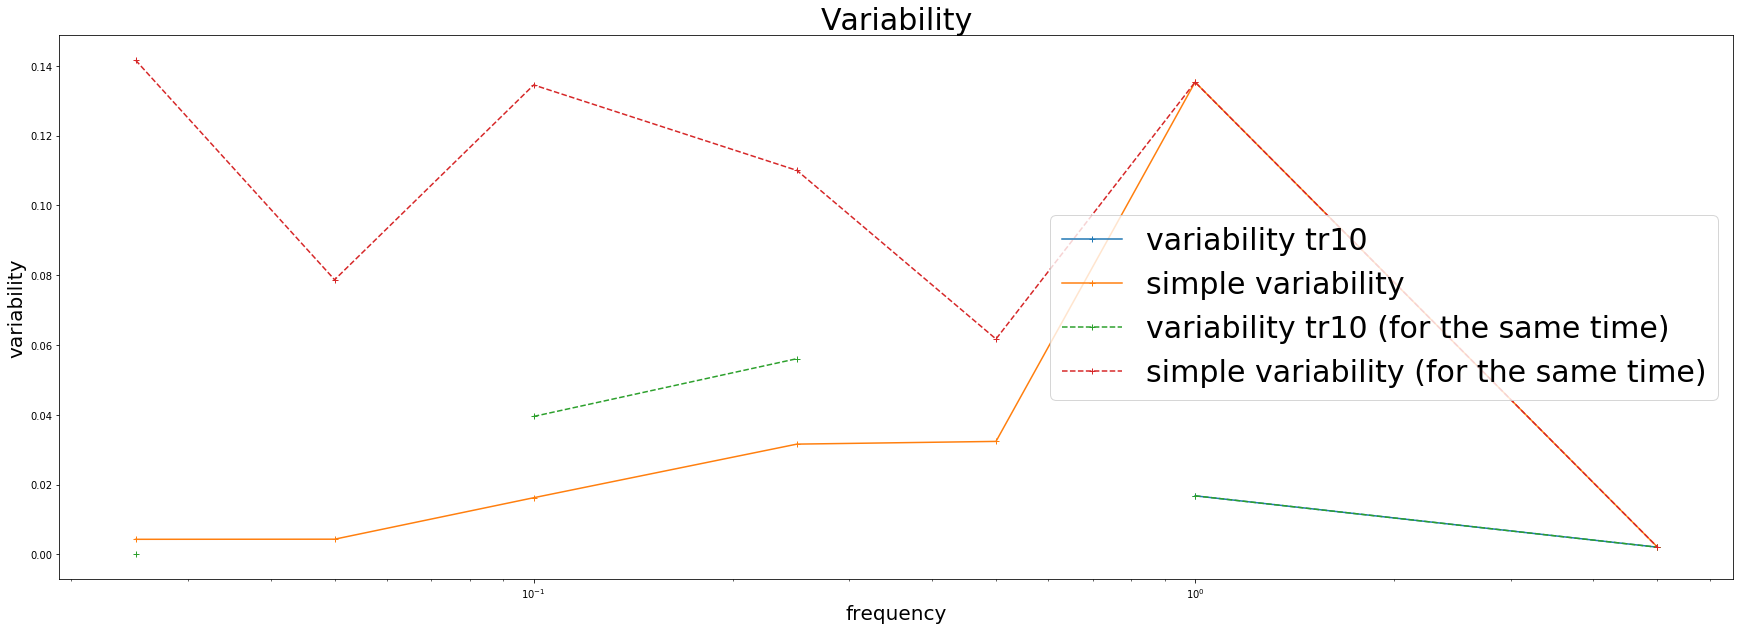

In [18]:
def plot_var(Freq, Var, Var_a, Var_same_time, Var_a_same_time):
    plt.figure(figsize = (30, 10))
    plt.semilogx(Freq, Var, "+-", label="variability tr10")
    plt.semilogx(Freq, Var_a, "+-", label="simple variability")
    plt.semilogx(Freq, Var_same_time, "+--", label="variability tr10 (for the same time)")
    plt.semilogx(Freq, Var_a_same_time, "+--", label="simple variability (for the same time)")
    plt.legend(fontsize = 30)
    plt.title("Variability", fontsize = 30)
    plt.xlabel("frequency", fontsize = 20)
    plt.ylabel("variability", fontsize = 20)
    plt.show()
    return 

plot_var(Freq, Var, Var_a, Var_same_time, Var_a_same_time)

##### Plot the variability for different frequency with variability for all the time and for just the same time (here 500).

# Moving variability

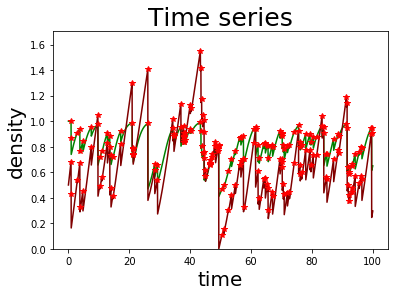

In [19]:
Fire_param["param_freq"]["p"] = 1
finalTime = 100
O_col = Ode(model = "allee_effect_adi_3", Init=Init, Param_phy= Param_phy, finalTime = finalTime, dt=dt, Fire_param = Fire_param)
O_col.solve_by_part()
O_col.plot_time_series(generation=False, show=False, legend = False)

In [20]:
Series = O_col.N[:]

In [21]:
def moving_average(Series, length):
    Moving_average = np.convolve(Series, np.ones(length)/length, mode='full')[length//2:]
    Moving_average = Moving_average[:len(Series)]
    Moving_average[:length//2] = np.NaN
    Moving_average[-length//2:] = np.NaN
    return Moving_average

def moving_var(Series, length):
    Moving_average = moving_average(Series, length)
    Moving_var = np.convolve((Series-Moving_average)**2, np.ones(length)/length, mode='full')[length//2:]
    Moving_var = Moving_var[:len(Series)]
    Moving_var[:length//2] = np.NaN
    Moving_var[-length//2:] = np.NaN
    return Moving_var

Moving_average = moving_var(Series, length=100)

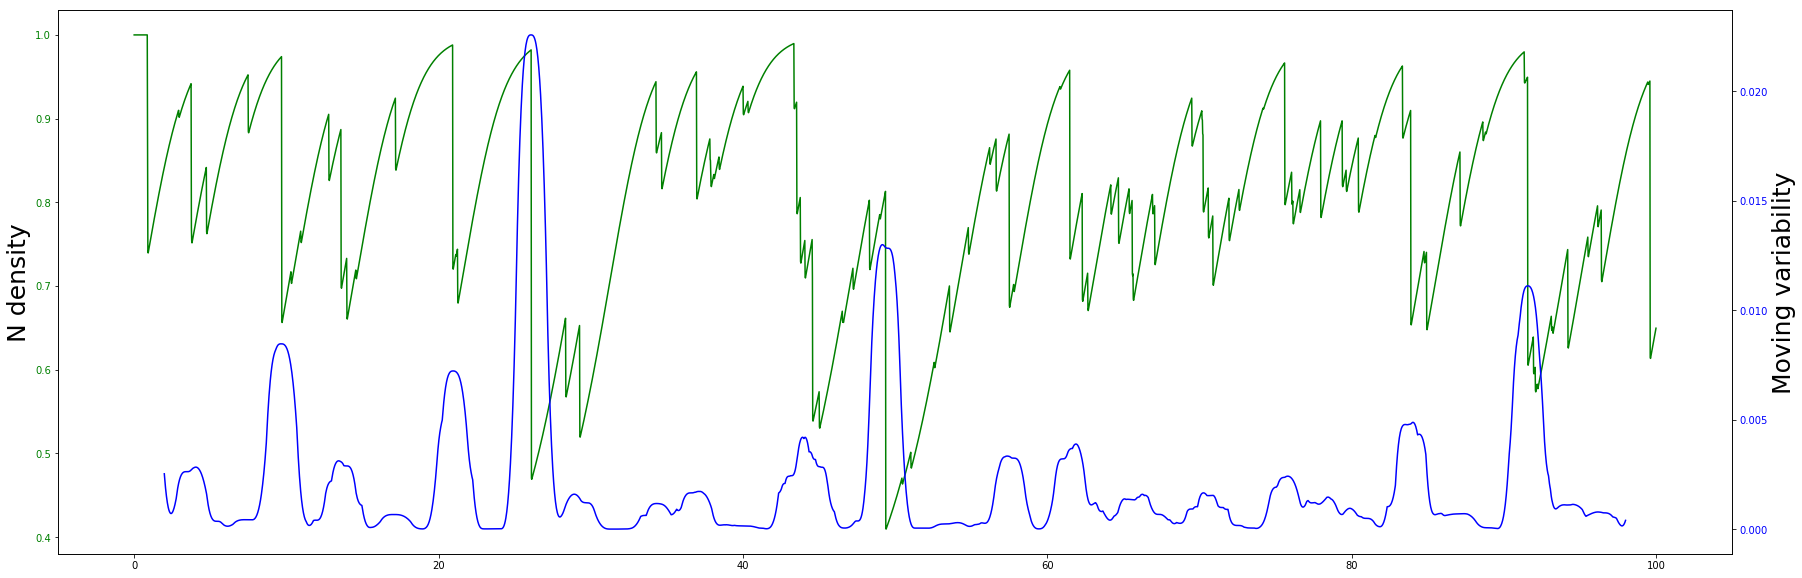

In [22]:
plt.figure(figsize = (30, 10))
plt.plot(O_col.Time, Series, color = "green", label="N")
plt.ylabel("N density", fontsize = 25)
plt.tick_params(axis='y', labelcolor="green")
plt.twinx()
plt.plot(O_col.Time, Moving_average, color = "blue", label="Moving Variability")
plt.ylabel("Moving variability", fontsize = 25)
plt.tick_params(axis='y', labelcolor="blue")
#plt.legend()
plt.show()

# Variability before collapse

In [23]:
freq_max = 5.
Ratio = np.array([100, 50, 20, 10, 5, 1])
#Ratio = np.array([10, 1])
Freq = freq_max/Ratio
Freq

array([0.05, 0.1 , 0.25, 0.5 , 1.  , 5.  ])

In [24]:
a = 0.2
#m_ref = M_v[0]
m_ref = 0.25
d = 0.0625
Param_phy = [a, m_ref, d]
#Param_phy = [a, m_ref]
#Init = [0, Param_phy[1]]

      
Init = [1., .5]


freq_ref = Freq_v[0]
Param_freq = {"p":  freq_max}#2
dt = min([0.1, 0.1/Param_freq["p"]]) ### Use small $dt$ (it could increase when we change the frequency) CHANGED
dt_ref = dt
#finalTime = 50
#finalTime_ref = finalTime

Param_strength = {"scale":0.005} # 0.005
Param_coupled = {"alpha":10., # 20
                 "beta":2.}# 2


Fire_param = {"model": "coupled",
                "frequence": "bernoulli",
                "param_freq" : Param_freq,
                "amplitude": "exponential",
                "Param_strength" : Param_strength,
                "Param_coupled" : Param_coupled,
                "type" : "proportionnal",
                "coef_W_N" : 5}

In [25]:
finalTime_min = 50

In [26]:
def generation_sol(Ratio, Freq):
    freq_max = np.max(Freq)
    dt = 0.01/freq_max
    finalTime_min = 50 ###################################################################################################################################### 10 ########
    O = Ode(model = "allee_effect_adi_3", Init=Init, Param_phy= Param_phy, finalTime = finalTime_min, dt=dt, Fire_param = Fire_param)
    Fire_events = O.Fire_events
    Fire_strength = O.Fire_strength
    Osave = []
    for i, (ratio, freq) in enumerate(zip(Ratio, Freq)):
        #ratio = freq_max/freq
        #print("\nratio", ratio)
        finalTime = int(finalTime_min*ratio)
        #print("finalTime", finalTime)
        Osave += [Ode(model = "allee_effect_adi_3", Init=Init, Param_phy= Param_phy, finalTime = finalTime, dt=dt, Fire_param = Fire_param)]
        Osave[i].Fire_events = np.zeros_like(Osave[i].Fire_events)
        Osave[i].Fire_strength = np.zeros_like(Osave[i].Fire_strength)
        Osave[i].Fire_events[::ratio]  = Fire_events[:]
        Osave[i].Fire_strength[::ratio] = Fire_strength[:]    

        Osave[i].solve_by_part()
    return Osave

In [27]:
Osave = generation_sol(Ratio, Freq)

### With the same time (50)

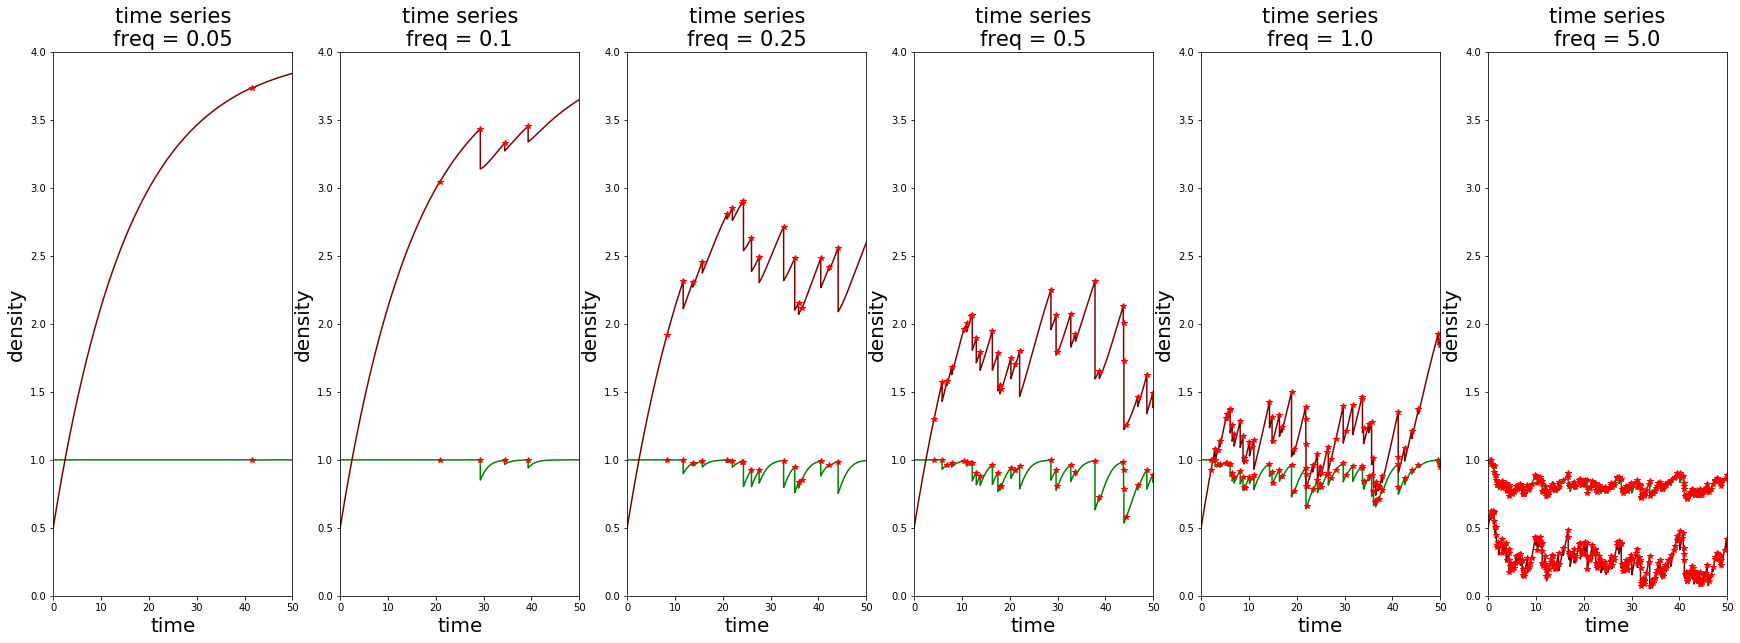

In [28]:
plt.figure(figsize = (30, 10))
for i, (ratio, freq) in enumerate(zip(Ratio, Freq)):
    plt.subplot(1, len(Freq), i+1)
    Osave[i].plot_time_series(generation=False, show=False, legend = False)
    plt.xlim(0, 50)
    plt.ylim(top = 4.)
    #plt.xlim(-2, 1.05*finalTime_ref)
    #plt.title("time series\nfreq = "+str(freq)+"\n   Variability_tr10 = "+str(round(var, 6))+"\nSimple variability = "+str(round(var_a, 6)), fontsize = 21)
    plt.title("time series\nfreq = "+str(freq), fontsize = 21)#+"\n   Variability_tr10 = "+str(round(var, 6))+"\nSimple variability = "+str(round(var_a, 6)), fontsize = 21)
    #        O.plot_time_series()
plt.show()

### With all the time

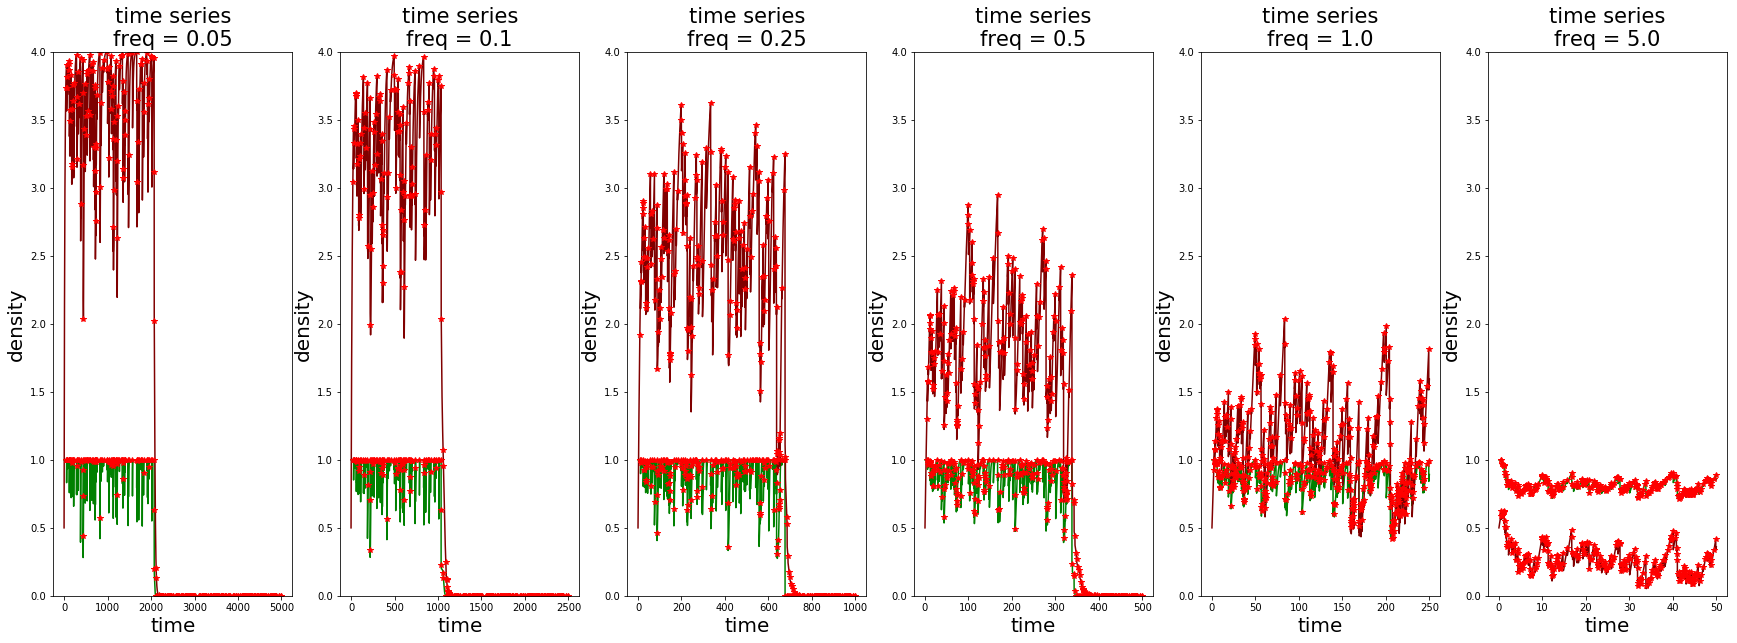

In [29]:
plt.figure(figsize = (30, 10))
for i, (ratio, freq) in enumerate(zip(Ratio, Freq)):
    plt.subplot(1, len(Freq), i+1)
    Osave[i].plot_time_series(generation=False, show=False, legend = False)
    #plt.xlim(0, 100)
    #plt.xlim(-2, 1.05*finalTime_ref)
    plt.ylim(top = 4.)
    #plt.title("time series\nfreq = "+str(freq)+"\n   Variability_tr10 = "+str(round(var, 6))+"\nSimple variability = "+str(round(var_a, 6)), fontsize = 21)
    plt.title("time series\nfreq = "+str(freq), fontsize = 21)#+"\n   Variability_tr10 = "+str(round(var, 6))+"\nSimple variability = "+str(round(var_a, 6)), fontsize = 21)
    #        O.plot_time_series()
plt.show()

In [30]:
def compute_var(Osave, Ratio, Freq):
    Var = np.zeros(len(Freq))
    Var_a = np.zeros_like(Var)
    Var_same_time = np.zeros_like(Var)
    Var_a_same_time = np.zeros_like(Var)
    for i, (ratio, freq) in enumerate(zip(Ratio, Freq)):
        var = Osave[i].variability("N")
        var_a = np.var(Osave[i].N)
        Ointer = Osave[i].copy()
        Ointer.N, Ointer.W = Ointer.N[Osave[i].Time < 500], Ointer.W[Osave[i].Time < 500]
        var_same_time = Ointer.variability("N")
        var_a_same_time = np.var((Osave[i].N)[Osave[i].Time < 500])
        Var[i] = var
        Var_a[i] = var_a    
        Var_same_time[i] = var_same_time
        Var_a_same_time[i] = var_a_same_time
    return Var, Var_a, Var_same_time, Var_a_same_time

Var, Var_a, Var_same_time, Var_a_same_time = compute_var(Osave, Ratio, Freq)

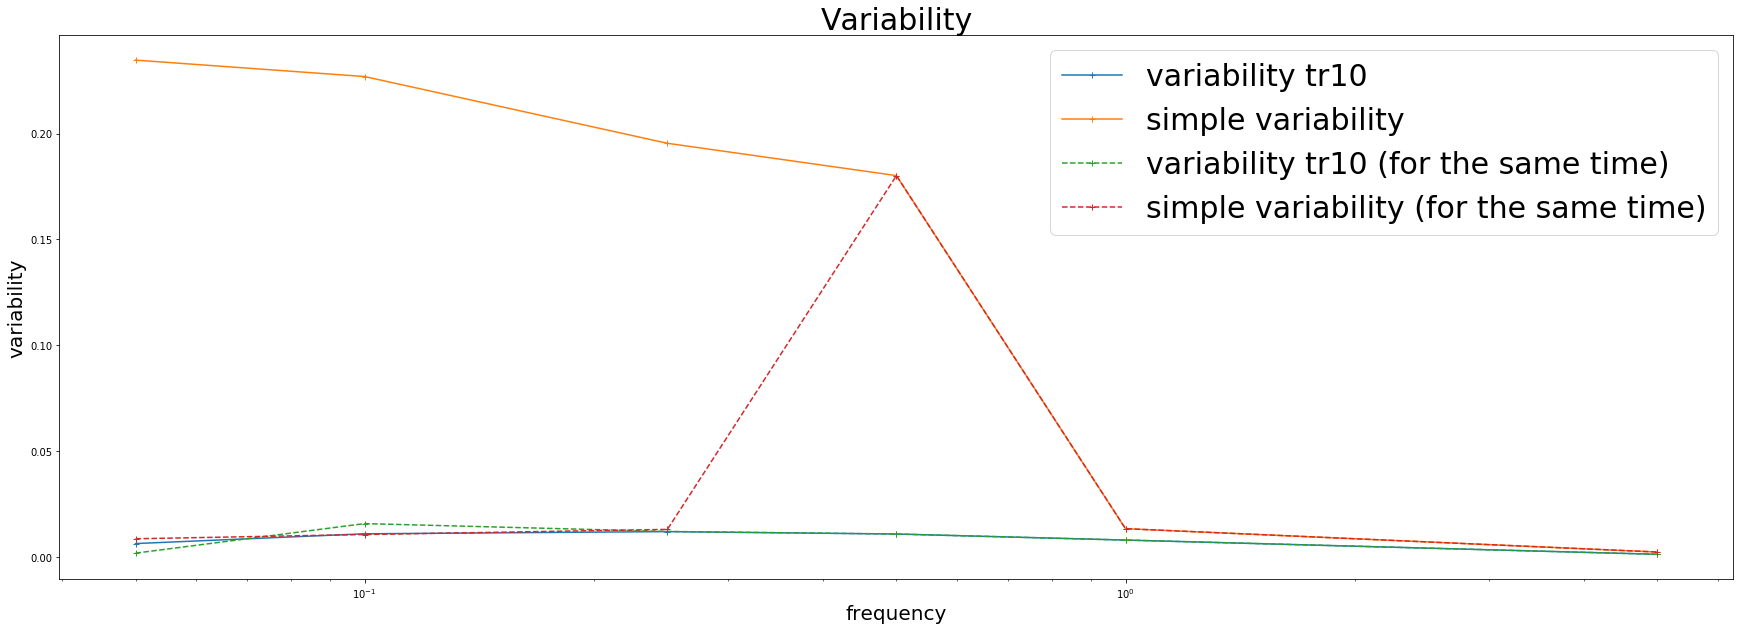

In [31]:
def plot_var(Freq, Var, Var_a, Var_same_time, Var_a_same_time):
    plt.figure(figsize = (30, 10))
    plt.semilogx(Freq, Var, "+-", label="variability tr10")
    plt.semilogx(Freq, Var_a, "+-", label="simple variability")
    plt.semilogx(Freq, Var_same_time, "+--", label="variability tr10 (for the same time)")
    plt.semilogx(Freq, Var_a_same_time, "+--", label="simple variability (for the same time)")
    plt.legend(fontsize = 30)
    plt.title("Variability", fontsize = 30)
    plt.xlabel("frequency", fontsize = 20)
    plt.ylabel("variability", fontsize = 20)
    plt.show()
    return 

plot_var(Freq, Var, Var_a, Var_same_time, Var_a_same_time)

In [32]:
mean = np.mean(Osave[i].N)

In [33]:
Cumul_sum_square = []
for i, (ratio, freq) in enumerate(zip(Ratio, Freq)):
    Cumul_sum_square += [np.zeros(len(Osave[i].N))]
    Cumul_sum_square[i][0] = (Osave[i].N[0]-mean)**2
    for j in range(1, len(Osave[i].N)):
        Cumul_sum_square[i][j] = Cumul_sum_square[i][j-1] + (Osave[i].N[j]-mean)**2

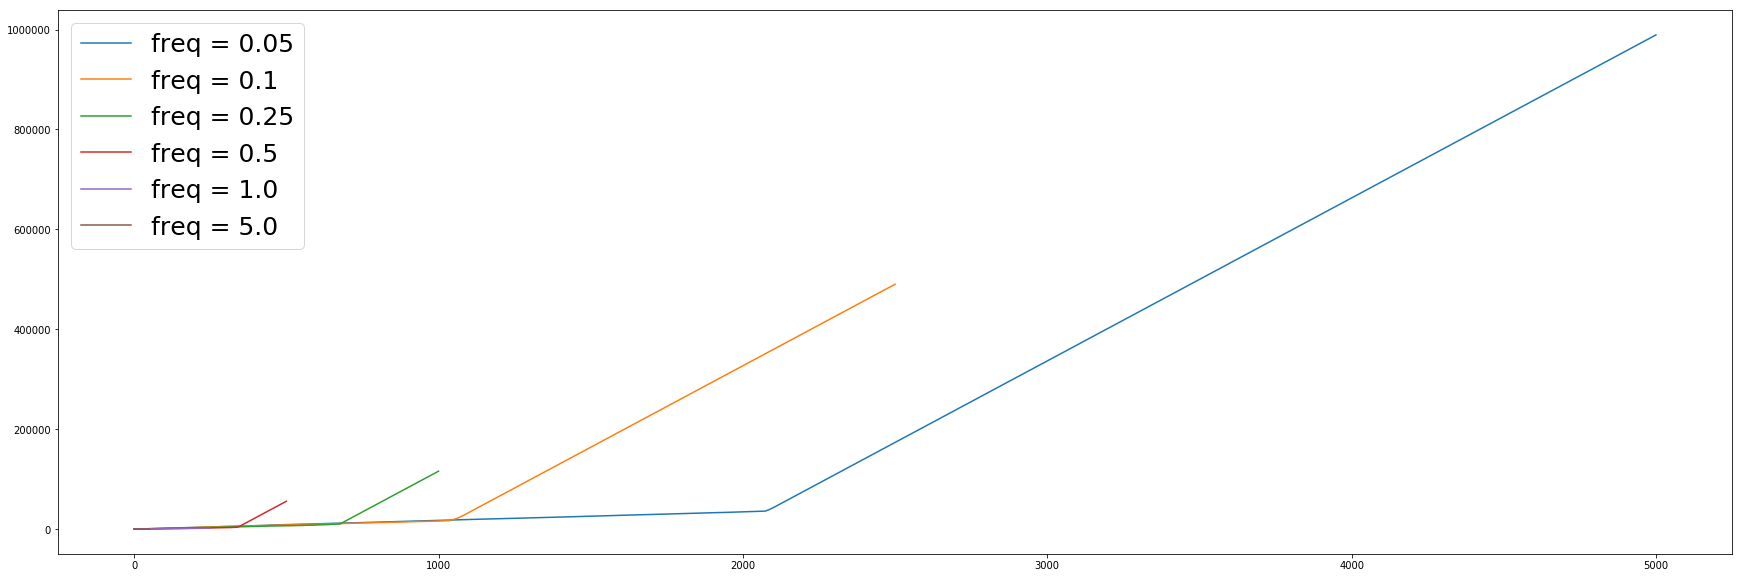

In [34]:
plt.figure(figsize = (30, 10))
for i, (ratio, freq) in enumerate(zip(Ratio, Freq)):
    plt.plot(Osave[i].Time, Cumul_sum_square[i], label = "freq = "+str(freq))
#plt.xlim(-5, 110)
plt.legend(fontsize = 25)
plt.show()

In [35]:
Var_time = []
for i, (ratio, freq) in enumerate(zip(Ratio, Freq)):
    Var_time += [np.zeros(len(Osave[i].N))]
    Var_time[i][0] = (Osave[i].N[0]-mean)**2
    for j in range(1, len(Osave[i].N)):
        Var_time[i][j] = (j*Var_time[i][j-1] + (Osave[i].N[j]-mean)**2)/(j+1)

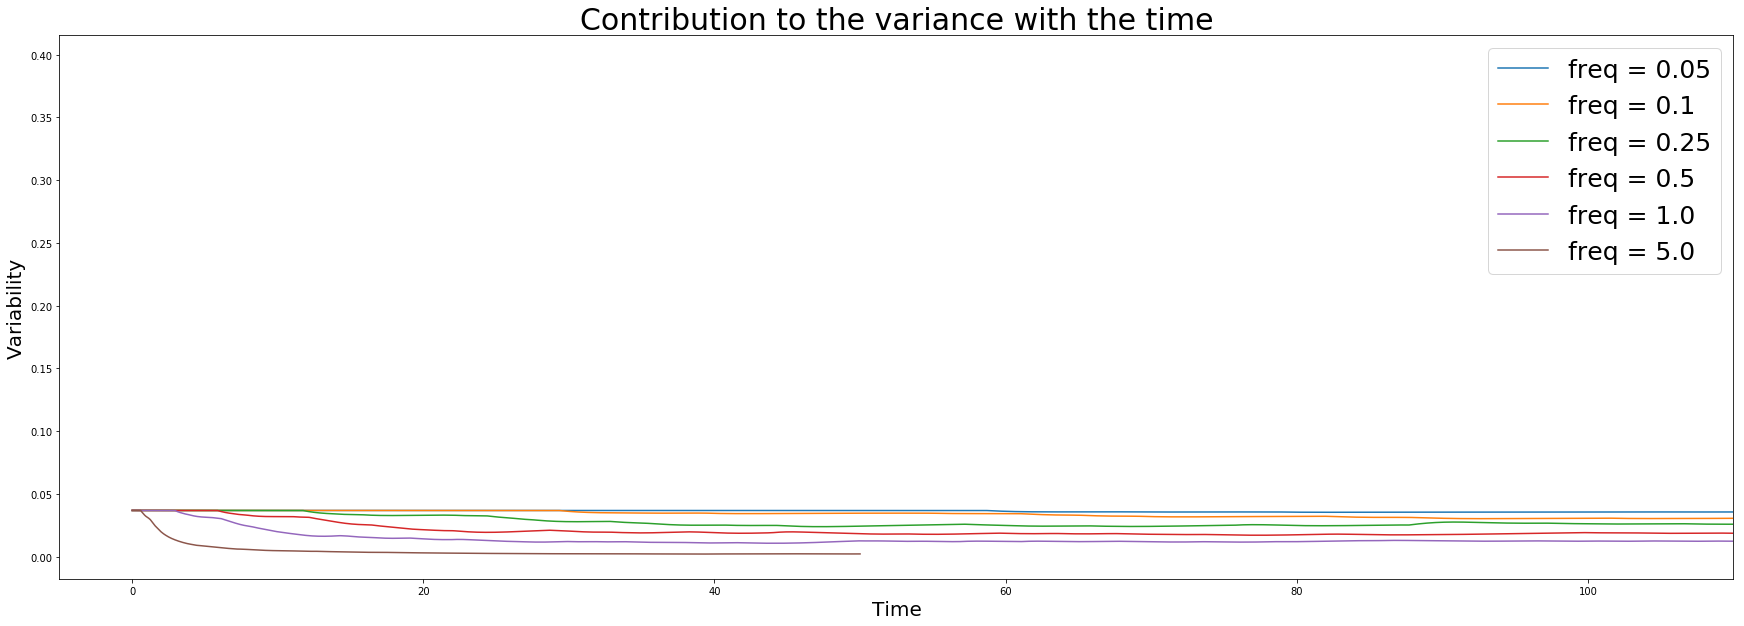

In [36]:
plt.figure(figsize = (30, 10))
for i, (ratio, freq) in enumerate(zip(Ratio, Freq)):
    plt.plot(Osave[i].Time, Var_time[i], label = "freq = "+str(freq))
plt.xlim(-5, 110)
plt.legend(fontsize = 25)
plt.title("Contribution to the variance with the time", fontsize = 30)
plt.ylabel("Variability", fontsize = 20)
plt.xlabel("Time", fontsize = 20)
plt.show()

In [37]:
mean

0.8078482851413524

# Summary

In [38]:
max_cum_var_lim = 0
for i, var in enumerate(Var_time):
    i_max = np.max(Var_time[i])
    if(max_cum_var_lim < i_max):
        max_cum_var_lim = i_max   

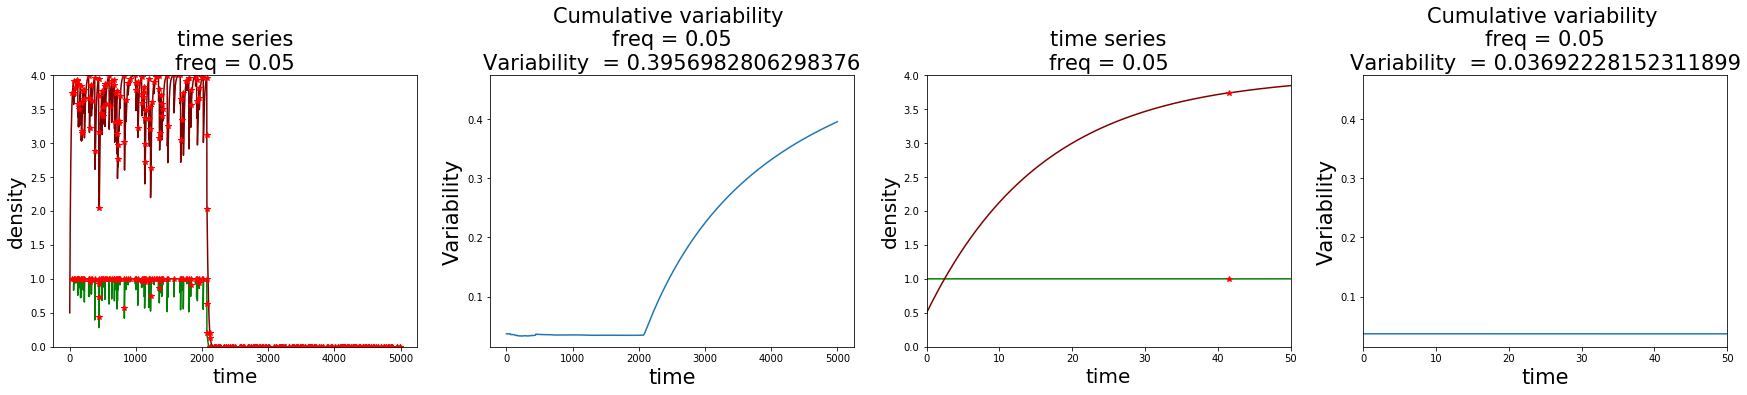

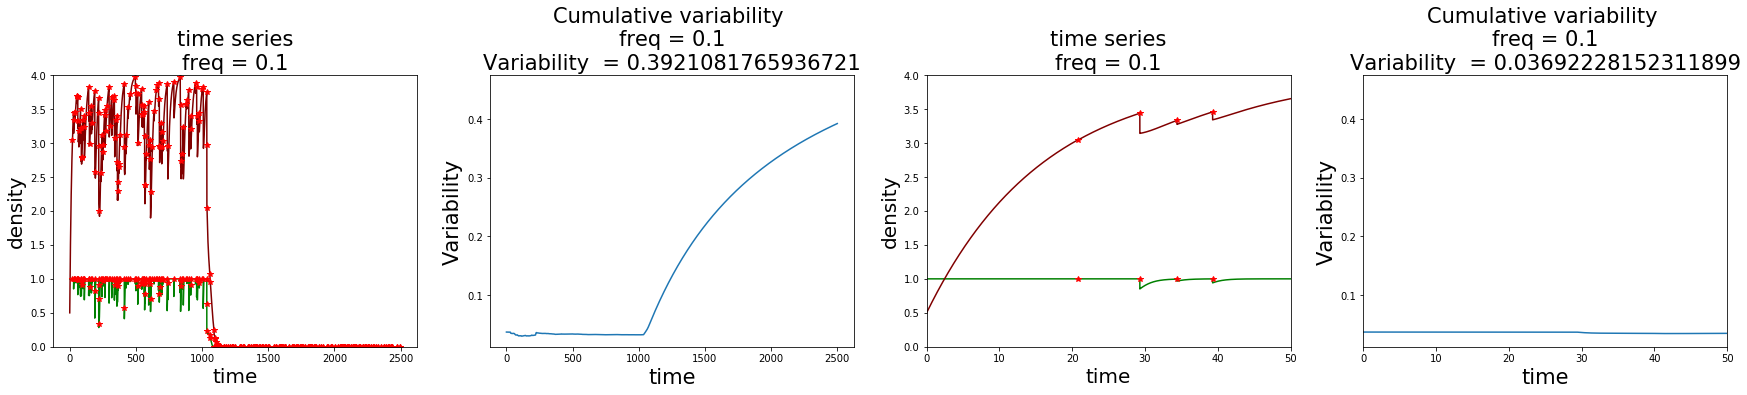

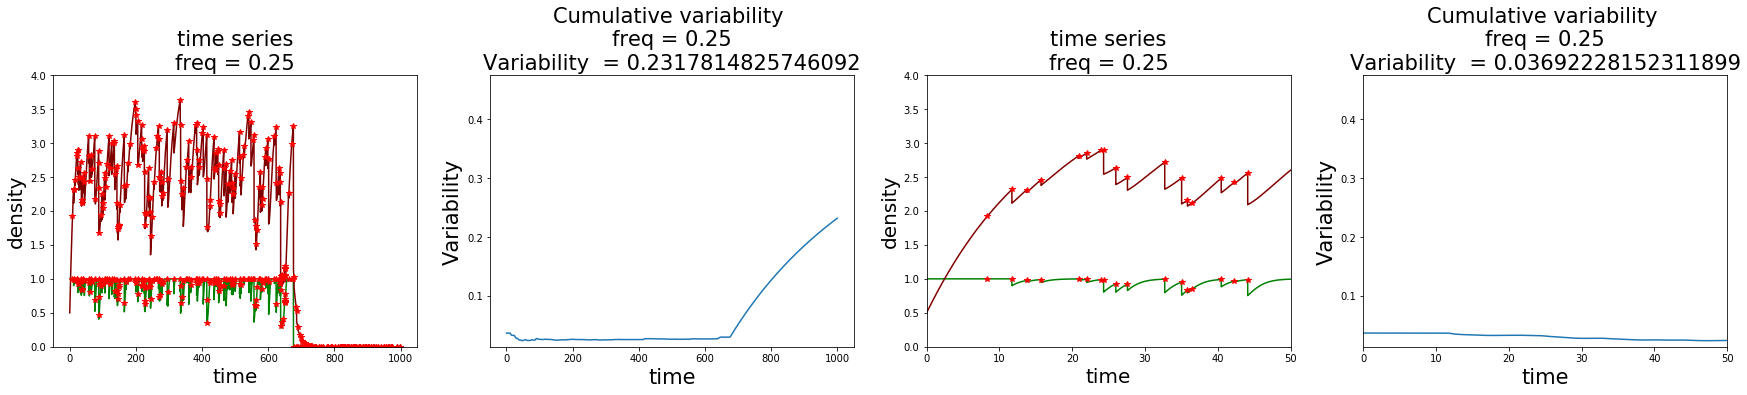

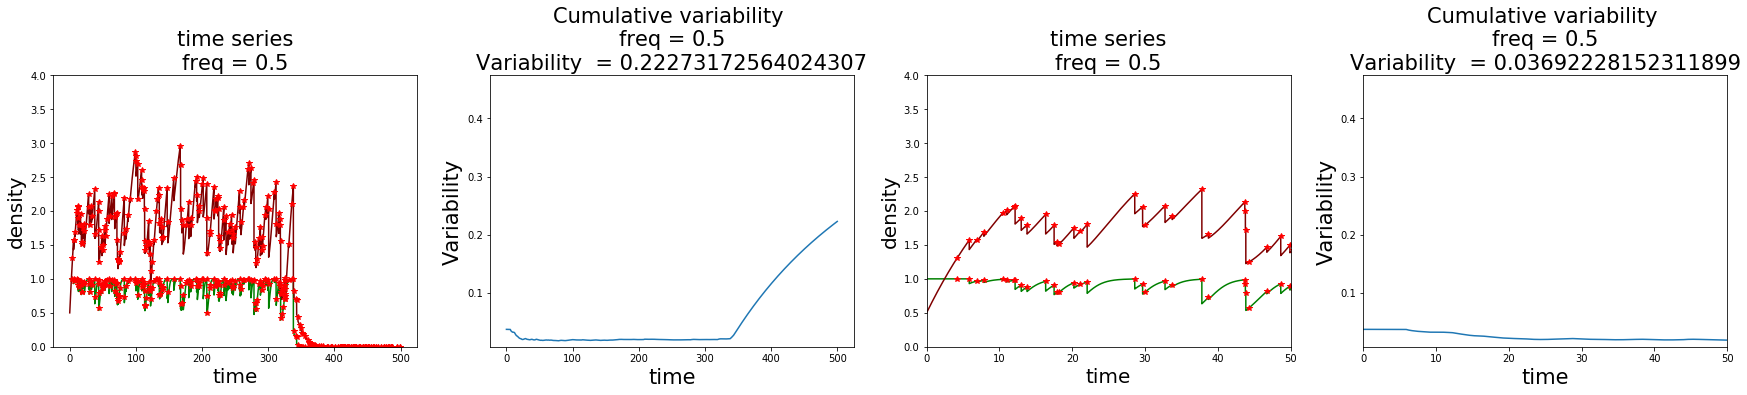

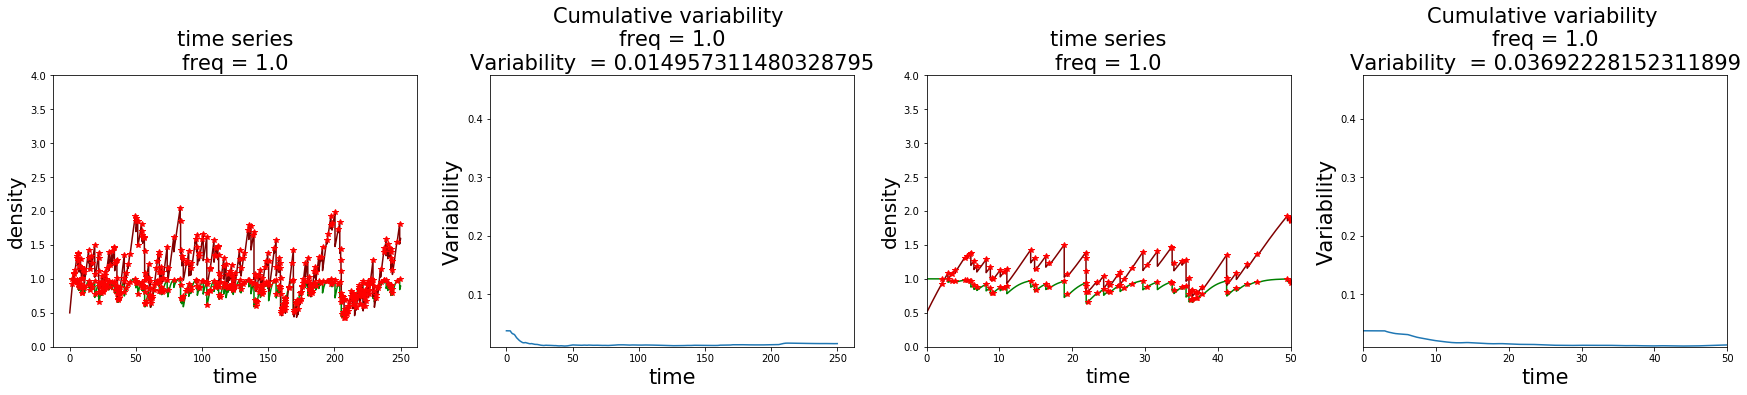

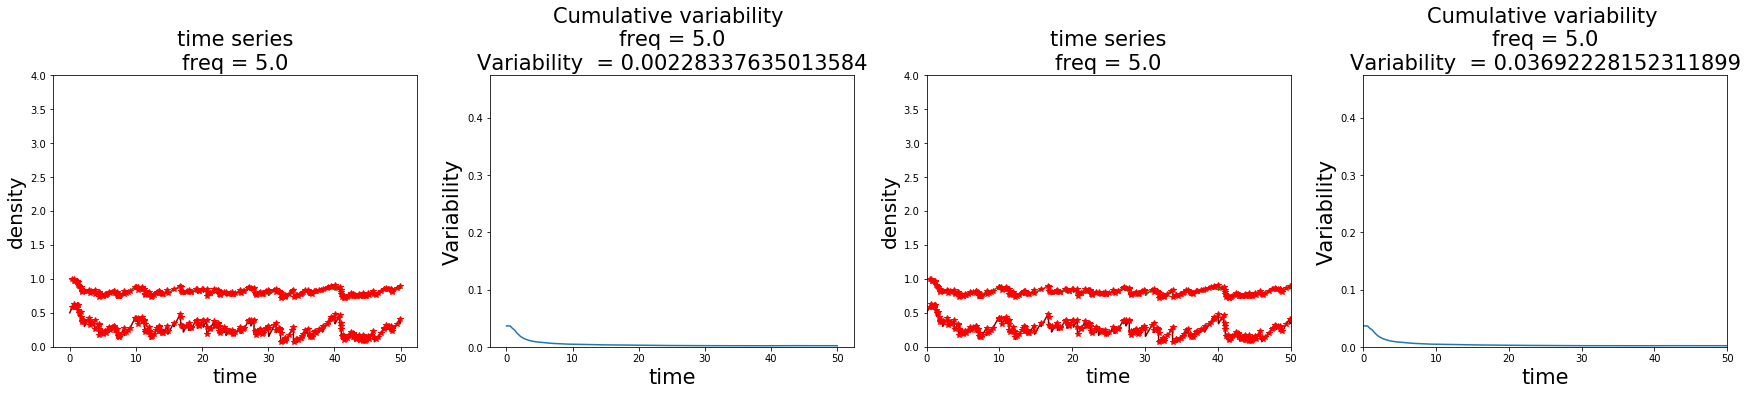

In [39]:
for i, (ratio, freq) in enumerate(zip(Ratio, Freq)):
    plt.figure(figsize = (30, 5))
    
    plt.subplot(1, 4, 1)
    Osave[i].plot_time_series(generation=False, show=False, legend = False)
    plt.ylim(top = 4)
    plt.title("time series\nfreq = "+str(freq), fontsize = 21)
    
    plt.subplot(1, 4, 2)
    plt.plot(Osave[i].Time, Var_time[i], label = "freq = "+str(freq))
    plt.ylabel("Variability", fontsize = 21)
    plt.xlabel("time", fontsize = 21)
    plt.ylim(top = 1.2*max_cum_var_lim)
    plt.title("Cumulative variability \nfreq = "+str(freq)+"\nVariability  = "+str(Var_time[i][-1]), fontsize = 21)
    
    plt.subplot(1, 4, 3)
    Osave[i].plot_time_series(generation=False, show=False, legend = False)
    plt.ylim(top = 4.)
    plt.xlim(0, 50)
    plt.title("time series\nfreq = "+str(freq), fontsize = 21)
        
    plt.subplot(1, 4, 4)
    plt.plot(Osave[i].Time, Var_time[i], label = "freq = "+str(freq))
    plt.ylabel("Variability", fontsize = 21)
    plt.xlabel("time", fontsize = 21)
    plt.ylim(top = 1.2*max_cum_var_lim)
    plt.xlim(0, 50)
    plt.title("Cumulative variability \nfreq = "+str(freq)+"\nVariability  = "+str(Var_time[i][finalTime_min]), fontsize = 21)
    
    plt.show()

# Always compute the variability before collapse

#### Parameter to have sometimes collapse

In [10]:
freq_max = 5.
Ratio = np.array([100, 50, 20, 10, 5, 1])
#Ratio = np.array([10, 1])
Freq = freq_max/Ratio
Freq

array([0.05, 0.1 , 0.25, 0.5 , 1.  , 5.  ])

In [11]:
a = 0.2
#m_ref = M_v[0]
m_ref = 0.25
d = 0.0625
Param_phy = [a, m_ref, d]
#Param_phy = [a, m_ref]
#Init = [0, Param_phy[1]]

      
Init = [1., .5]


freq_ref = Freq_v[0]
freq_max = 5.
Param_freq = {"p":  freq_max}#2
dt = min([0.1, 0.1/Param_freq["p"]]) ### Use small $dt$ (it could increase when we change the frequency) CHANGED
dt_ref = dt
#finalTime = 50
#finalTime_ref = finalTime

Param_strength = {"scale":0.005} # 0.005
Param_coupled = {"alpha":10., # 20
                 "beta":2.}# 2


Fire_param = {"model": "coupled",
                "frequence": "bernoulli",
                "param_freq" : Param_freq,
                "amplitude": "exponential",
                "Param_strength" : Param_strength,
                "Param_coupled" : Param_coupled,
                "type" : "proportionnal",
                "coef_W_N" : 5}

In [12]:
Osave = generation_sol(Ratio, Freq)

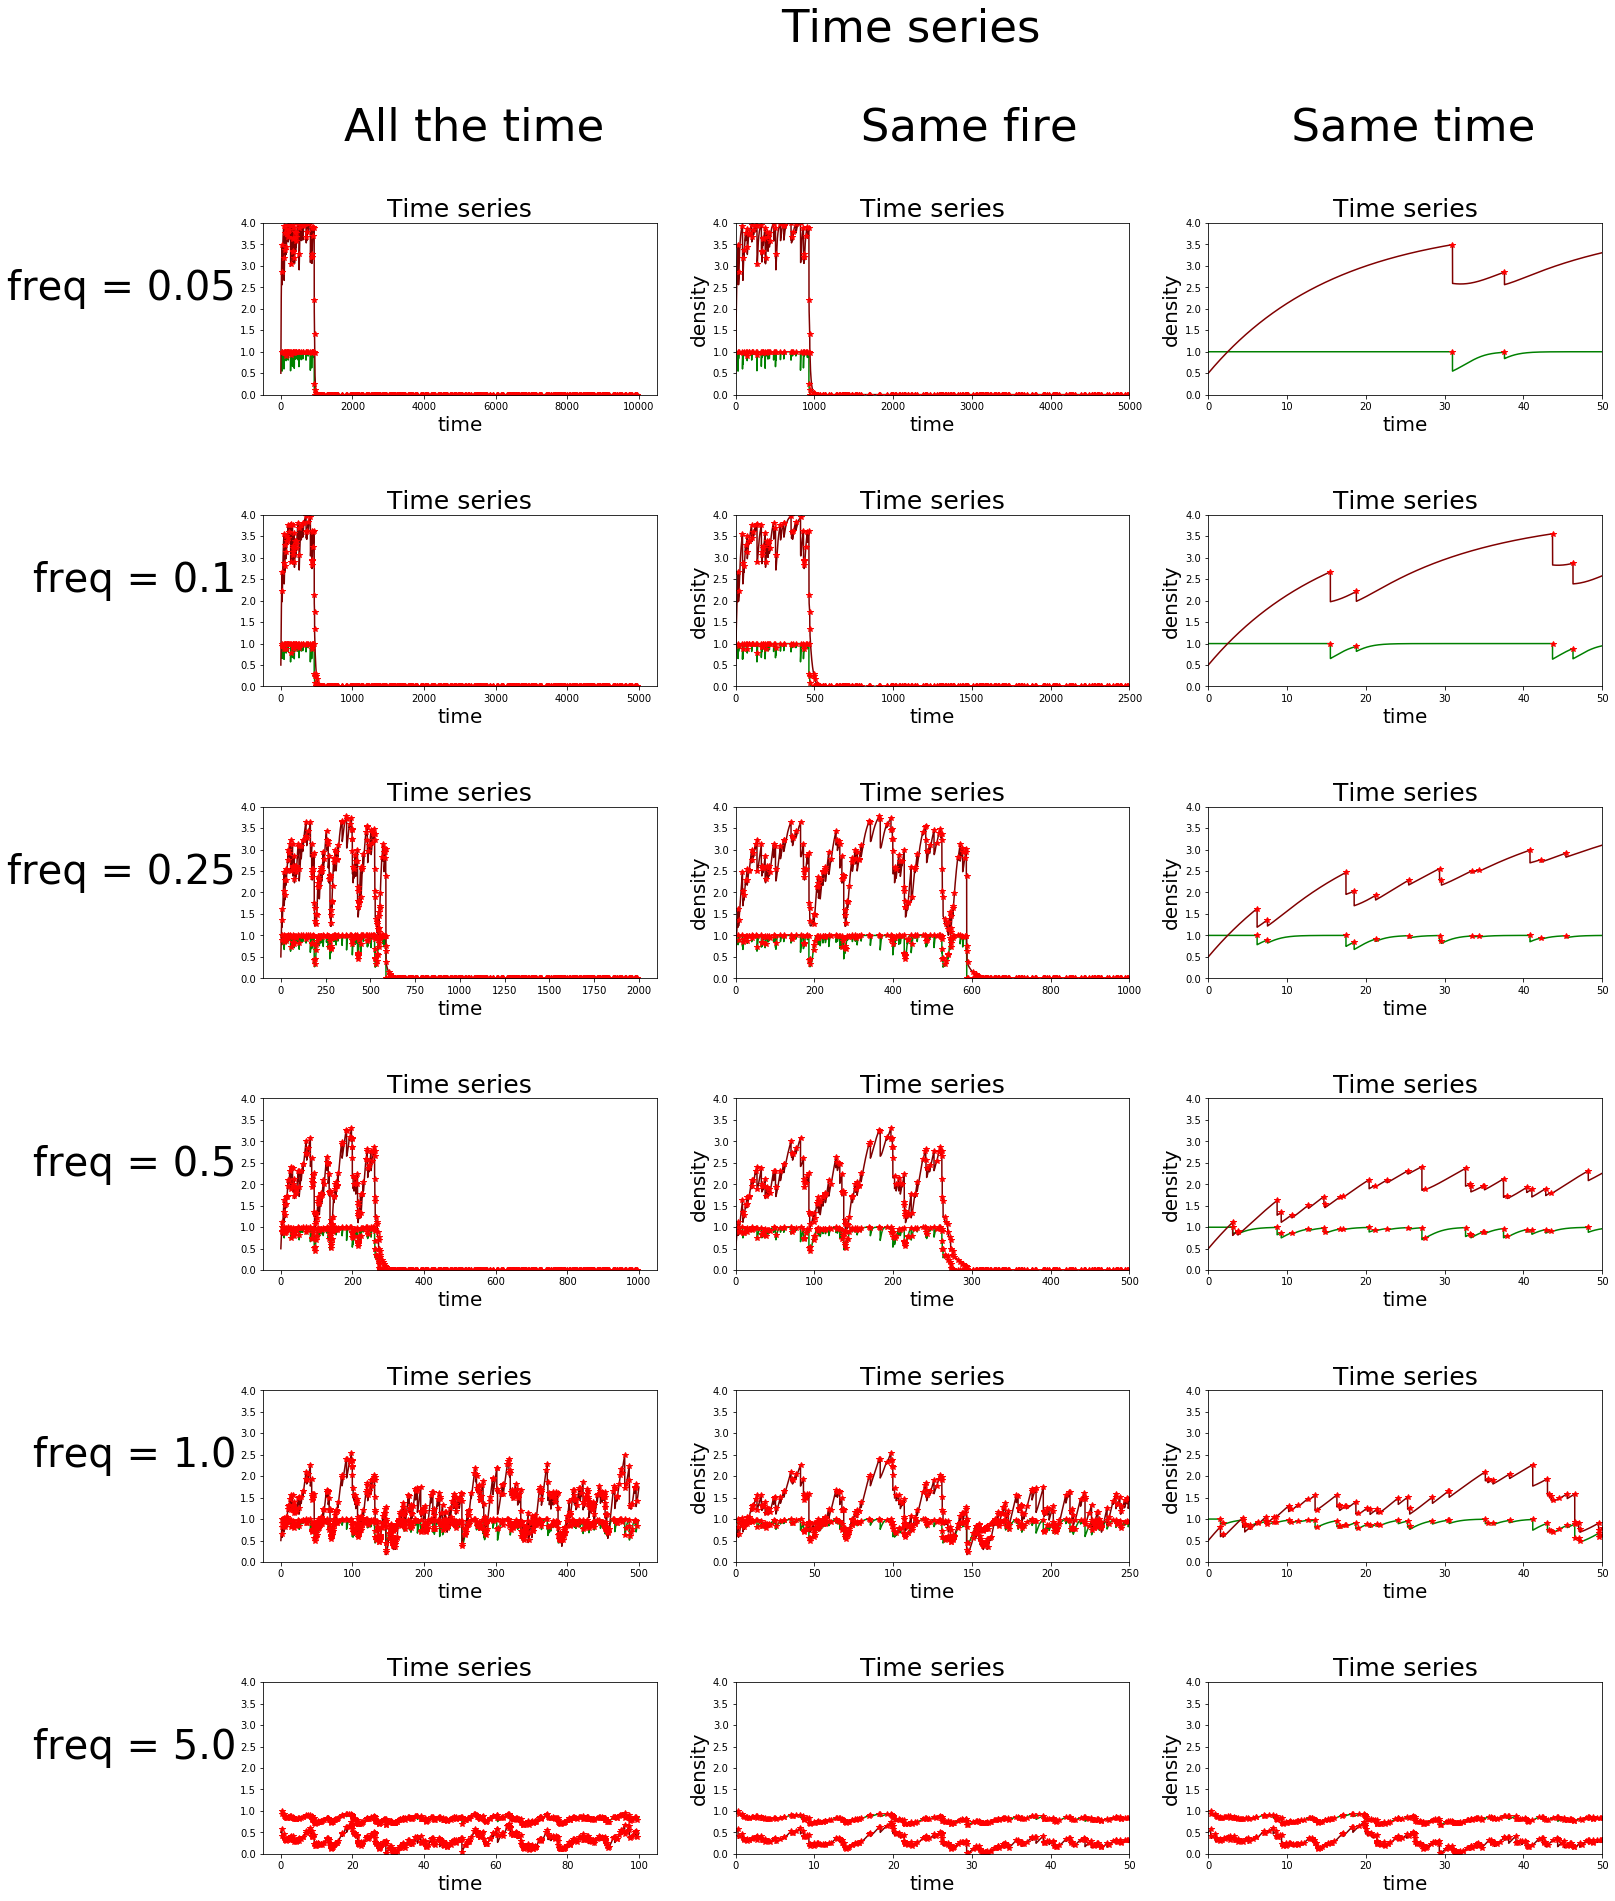

In [28]:
limiteur = 50
nbre_row = len(Ratio)

#plt.figure(figsize = (25, 5*nbre_row))        
fig, axes = plt.subplots(nbre_row, 3, figsize = (24, 5*nbre_row))
plt.suptitle("Time series\n\n    All the time                  Same fire               Same time\n\n\n", fontsize = 45)

#plt.text(x= 0.5, y=0.95, s="All the time\t\tSame fire\t\tSame time", fontsize = 35)
#plt.text(x= 0.5, y=1, s="All the time", fontsize = 35, transform=fig.transFigure)
#plt.text(x= 0.5, y=0.85, s="Same fire", fontsize = 35, transform=fig.transFigure)
#plt.text(x= 0.8, y=0.95, s="Same time", fontsize = 35, transform=fig.transFigure)

#plt.text(x= 0.8, y=0.95, s="freq = 0.05", fontsize = 30)
#plt.text(x=-0.1, y=0.8, s="freq = 0.05", fontsize = 30)



    
for i, (ratio, freq) in enumerate(zip(Ratio, Freq)):
    #axes[i][0].set_ylabel("freq = "+str(freq))

    #plt.text(x=-160, y=-5, s="freq = "+str(freq), fontsize = 30)
    plt.subplot(nbre_row, 3, 3*i+1)
    #    plt.text(x=-50, y=2, s="freq = "+str(freq), fontsize = 30)
    Osave[i].plot_time_series(generation=False, show=False, legend = False)
    plt.ylabel("freq = "+str(freq), fontsize = 40, rotation=0, horizontalalignment = "right")
    plt.ylim(top = 4)
    #plt.title("\nfreq = "+str(freq), fontsize = 21)
        
        
    plt.subplot(nbre_row, 3, 3*i+2)
    Osave[i].plot_time_series(generation=False, show=False, legend = False)
    plt.ylim(top = 4.)
    plt.xlim(0, limiteur * ratio)
   # plt.title("\nfreq = "+str(freq), fontsize = 21)        

        
    plt.subplot(nbre_row, 3, 3*i+3)
    Osave[i].plot_time_series(generation=False, show=False, legend = False)
    plt.ylim(top = 4.)
    plt.xlim(0, 50)
  #  plt.title("\nfreq = "+str(freq), fontsize = 21)  

    
plt.subplots_adjust(wspace=0.2, hspace=0.7)
#fig.tight_layout()

plt.show()